# Pandas Introduction

- [Data Manipulation](#Data-Create,-Data-Manipuling)
- [Setup](#Setup)
- [Plotting](#Plotting)
- [Plotting with Auguments](#Plotting-with-Auguments)
- [Kinds of Plotting](#Kinds of Plotting)
- [Data Reading/writting](#Data-Reading/writting)
- [Computation With Series and Dataframes](#Computation-With-Series/Dataframes)
- [Dataframe Split, Apply, Combine](#Dataframe-Split/Apply/Combine)
- [Manipulating Dates and Times](#Manipulating-Dates-and-Times)
- [Vectorized String Operations](#Vectorized-String-Operations)
- [Combining DataFrames](#Combining-DataFrames)
- [Missing Data Handling](#Cleaning-Data-with-Missing-Values)
- [Reshaping Dataframes/Pivot Tables](#Reshaping-Dataframes/Pivot-Tables)


## Data Create, Data Manipuling

- **Create dataframe**,  

```python 
data={'年份': [2002,2006,2010,2014,2018],
      '主辦國':['韓國/日本','德國','南非','巴西','俄羅斯'],
      '衛冕冠軍':['法國','巴西','意大利','西班牙','德國'],
      '最後成績':['分組賽出局','八強出局','分組賽出局','分組賽出局','八強出局'],
      '當屆冠軍': ['巴西','意大利','西班牙','德國','法國']  
}
idx=[2002,2006,2010,2014]
df = pd.DataFrame(data, index =idx)
``` 

In [1]:
from IPython.display import Image
import pandas as pd

json 
---
format: ```{feature_1:data_1,...,feature_n:data_n}```

In [2]:
data={'年份': [2002,2006,2010,2014,2018],
      '主辦國':['韓國/日本','德國','南非','巴西','俄羅斯'],
      '衛冕冠軍':['法國','巴西','意大利','西班牙','德國'],
      '最後成績':['分組賽出局','八強出局','分組賽出局','分組賽出局','八強出局'],
      '當屆冠軍': ['巴西','意大利','西班牙','德國','法國']
}
idx=range(1,5)
df = pd.DataFrame(data)
df

年份    主辦國 衛冕冠軍   最後成績 當屆冠軍
0  2002  韓國/日本   法國  分組賽出局   巴西
1  2006     德國   巴西   八強出局  意大利
2  2010     南非  意大利  分組賽出局  西班牙
3  2014     巴西  西班牙  分組賽出局   德國
4  2018    俄羅斯   德國   八強出局   法國

In [3]:
df[['年份','當屆冠軍']]

年份 當屆冠軍
0  2002   巴西
1  2006  意大利
2  2010  西班牙
3  2014   德國
4  2018   法國

Try the following commands:
```
df.count()
df.info()
df.describe()
```

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年份      5 non-null      int64 
 1   主辦國     5 non-null      object
 2   衛冕冠軍    5 non-null      object
 3   最後成績    5 non-null      object
 4   當屆冠軍    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [5]:
# Filter
df[df['當屆冠軍']=='巴西']

年份    主辦國 衛冕冠軍   最後成績 當屆冠軍
0  2002  韓國/日本   法國  分組賽出局   巴西

In [6]:
df.columns

Index(['年份', '主辦國', '衛冕冠軍', '最後成績', '當屆冠軍'], dtype='object')

In [7]:
list(df.columns)

['年份', '主辦國', '衛冕冠軍', '最後成績', '當屆冠軍']

In [8]:
for idx in list(df.columns):
    # declude non-country columns
    if (idx !='年份') and (idx !='最後成績'):
       print(df[df[idx]=='巴西'])

     年份 主辦國 衛冕冠軍   最後成績 當屆冠軍
3  2014  巴西  西班牙  分組賽出局   德國
     年份 主辦國 衛冕冠軍  最後成績 當屆冠軍
1  2006  德國   巴西  八強出局  意大利
     年份    主辦國 衛冕冠軍   最後成績 當屆冠軍
0  2002  韓國/日本   法國  分組賽出局   巴西


In [9]:
for idx in list(df.index):
    print("{} FIFA 冠軍: {}".format(df.iloc[idx,0],df.iloc[idx,4]))

2002 FIFA 冠軍: 巴西
2006 FIFA 冠軍: 意大利
2010 FIFA 冠軍: 西班牙
2014 FIFA 冠軍: 德國
2018 FIFA 冠軍: 法國


- **Drop an observation (row)**
``` 
df.drop([1])
``` 

In [12]:
df.drop([1])

年份    主辦國 衛冕冠軍   最後成績 當屆冠軍
0  2002  韓國/日本   法國  分組賽出局   巴西
2  2010     南非  意大利  分組賽出局  西班牙
3  2014     巴西  西班牙  分組賽出局   德國
4  2018    俄羅斯   德國   八強出局   法國

- **Drop a variable (column)**, Note: axis=1 denotes that we are referring to a column, not a row

```
df.drop('reports', axis=1)
```

In [13]:
df.drop('衛冕冠軍', axis=1)

年份    主辦國   最後成績 當屆冠軍
0  2002  韓國/日本  分組賽出局   巴西
1  2006     德國   八強出局  意大利
2  2010     南非  分組賽出局  西班牙
3  2014     巴西  分組賽出局   德國
4  2018    俄羅斯   八強出局   法國

- **Drop a row if it contains a certain value **, (in this case, '分組賽出局')

```
df[df['最後成績'] != '分組賽出局']
```

In [14]:
df[df['最後成績'] != '分組賽出局']

年份  主辦國 衛冕冠軍  最後成績 當屆冠軍
1  2006   德國   巴西  八強出局  意大利
4  2018  俄羅斯   德國  八強出局   法國


## Setup



```python
# import packages
import pandas as pd
import matplotlib.pyplot as plt

# display the picture inline
%matplotlib inline

# display zoomable picture
%matplotlib notebook
```

In [10]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
# from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

%matplotlib inline

In [11]:
df = pd.read_csv("data/train.csv") 

In [ ]:
df.to_csv("data/train_1.csv",index=False)

In [12]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
df.head(3)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Plotting
</code>
- **Series**,  with a series, pandas plots the values against the index:
``` 
 > ax=s.plot()
```

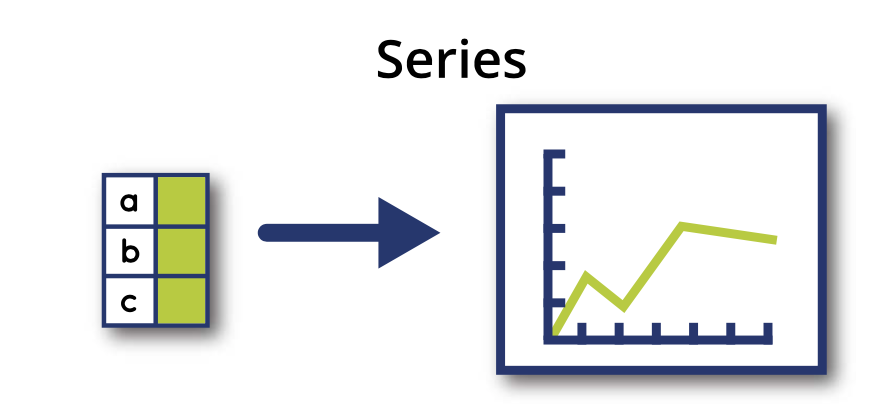

In [3]:
Image("imgs/series.png",width=600)


- **Dataframe**, with a Dataframe, pandas create one line per column:
``` 
 > ax=df.plot()
```

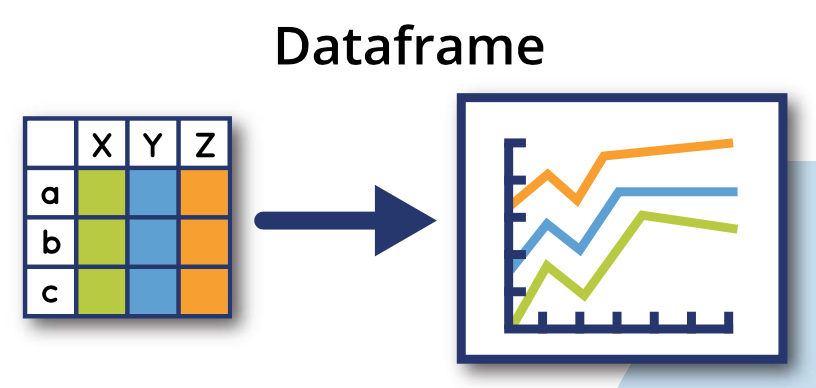

In [4]:
Image("imgs/dataframe.png",width=600)


- **Labels**, Use Matplotlib to override or add annotations:

```
 > ax.set_xlabel('Time')
 > ax.set_ylabel('Value')
 > ax.set_title('Experiment A')
```

pass labels if yoy want to override the column names and set the legend location:
```
 > ax.legend(labels,loc="best")
```

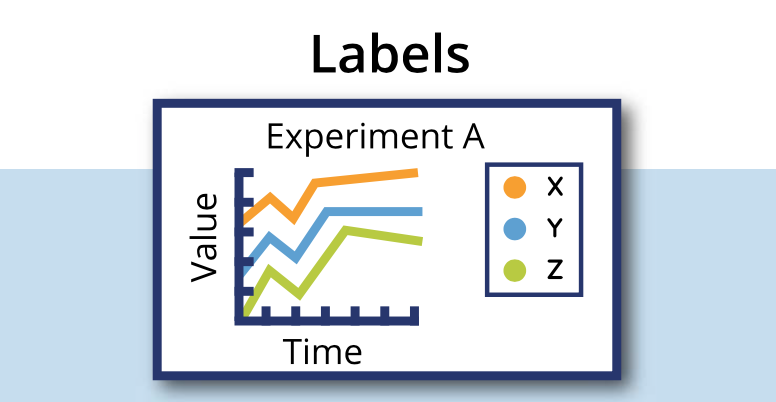

In [5]:
Image("imgs/labels.png",width=600)

In [ ]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Plotting with Auguments
</code>


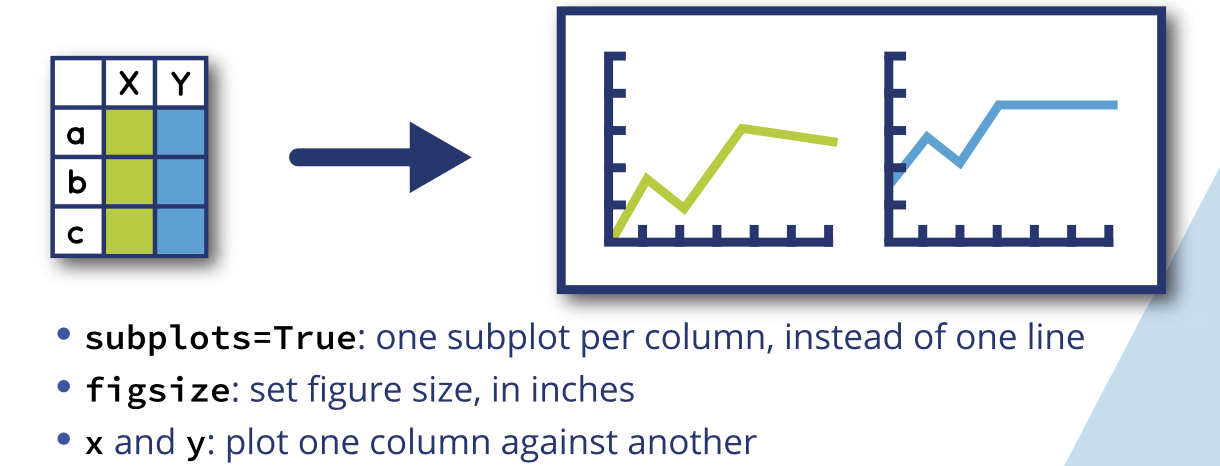

In [7]:
Image("imgs/augument.png",width=600)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Kinds of Plotting
</code>

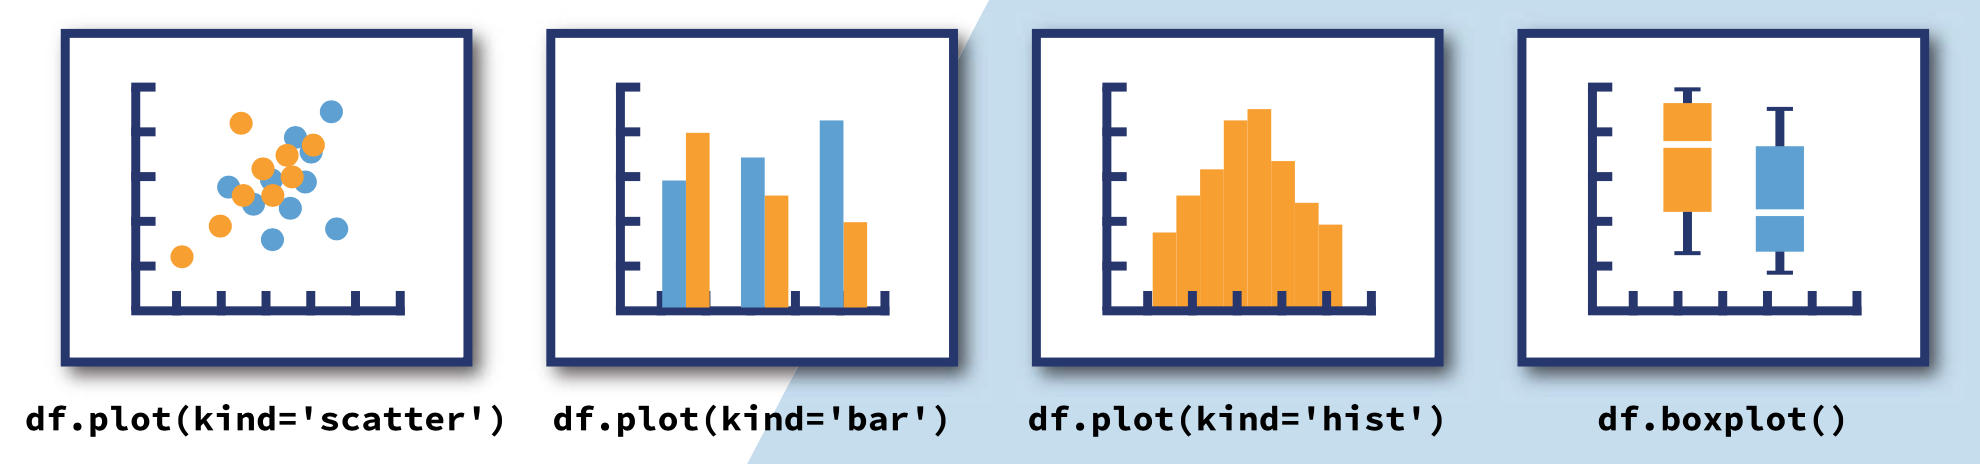

In [8]:
Image("imgs/kind.png",width=600)

In [ ]:
plt.figure(figsize=(12,8))
ax=plt.subplot(3,1,1)
df.Age[df.Pclass == 1].plot()
ax=plt.subplot(3,1,2)
df.Age[df.Pclass == 2].plot()
ax=plt.subplot(3,1,3)
df.Age[df.Pclass == 3].plot()

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Data Reading/writting
</code>
Methods to read data are all named `pd.read_*` where `*` is the file type. Series and DataFrames can be saved to disk using their `to_*` method.



<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Usage Patterns
</code>
 - Use `pd.read_clipboard()` for one-off data extractions.
 - Use the other `pd.read_*` methods in scripts for repeatable analyses.



<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Reading text into Dataframe
</code>

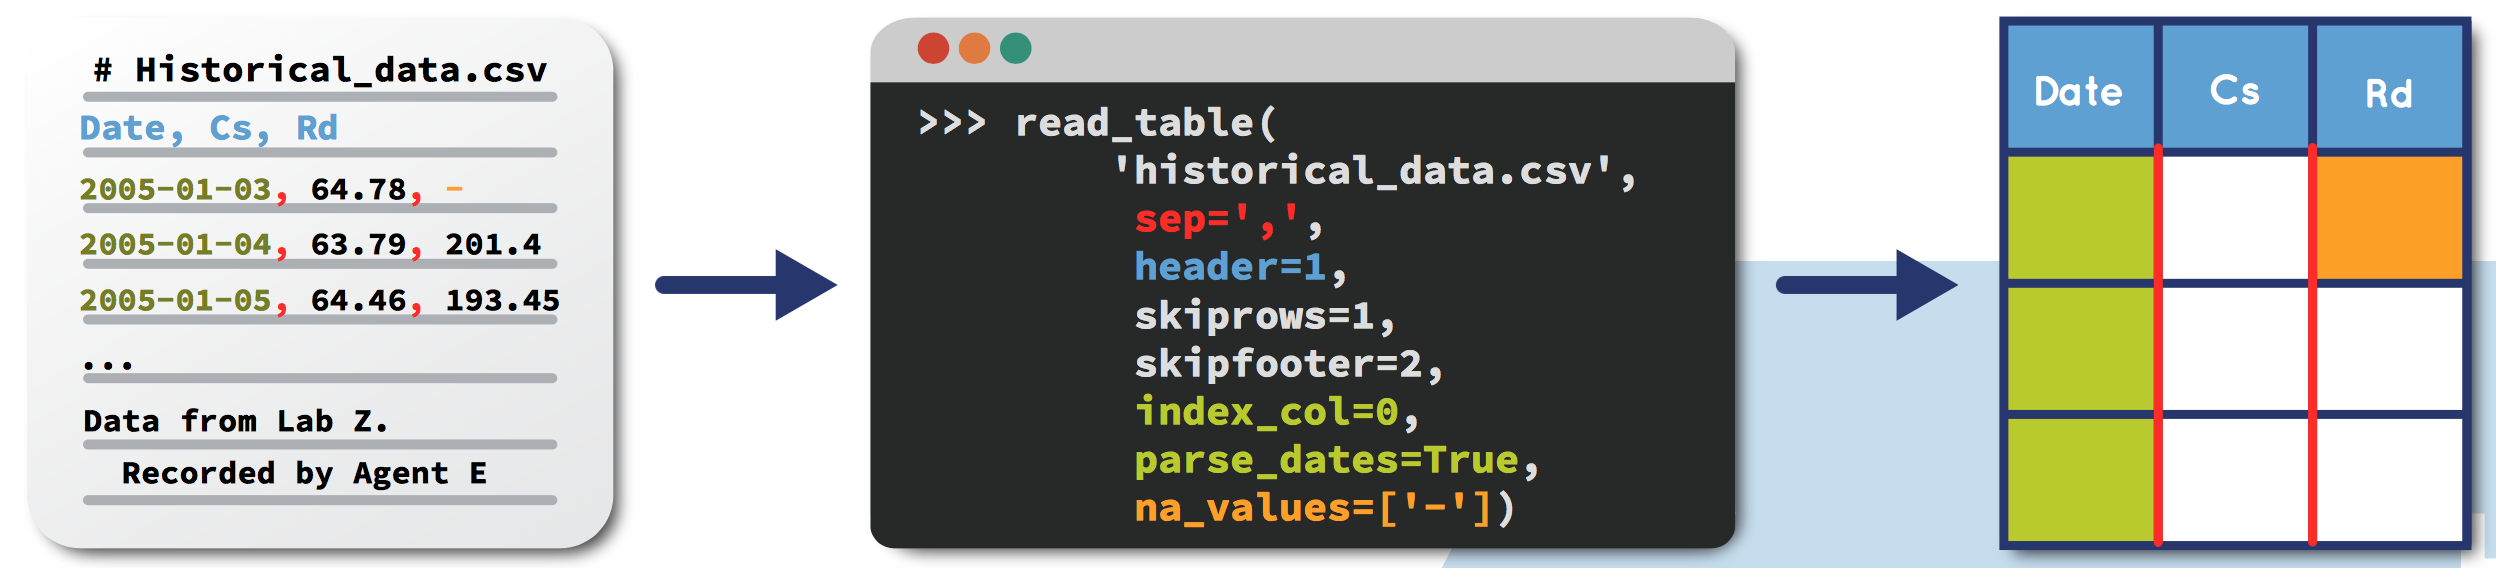

In [9]:
Image("imgs/data.png",width=600)

**Other arguments**
- names: set or override column names
- parse_dates: accepts multiple argument types, see on the right • converters: manually process each element in a column
- comment: character indicating commented line
- chunksize: read only a certain number of rows each time



**Possible values of parse_dates**

- [0, 2]: Parse columns 0 and 2 as separate dates
- [[0, 2]]: Group columns 0 and 2 and parse as single date 
- {'Date': [0, 2]}: Group columns 0 and 2, parse as
single date in a column named Date.

Dates are parsed after the converters have been applied.

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Parsing Tables from the Web
</code>

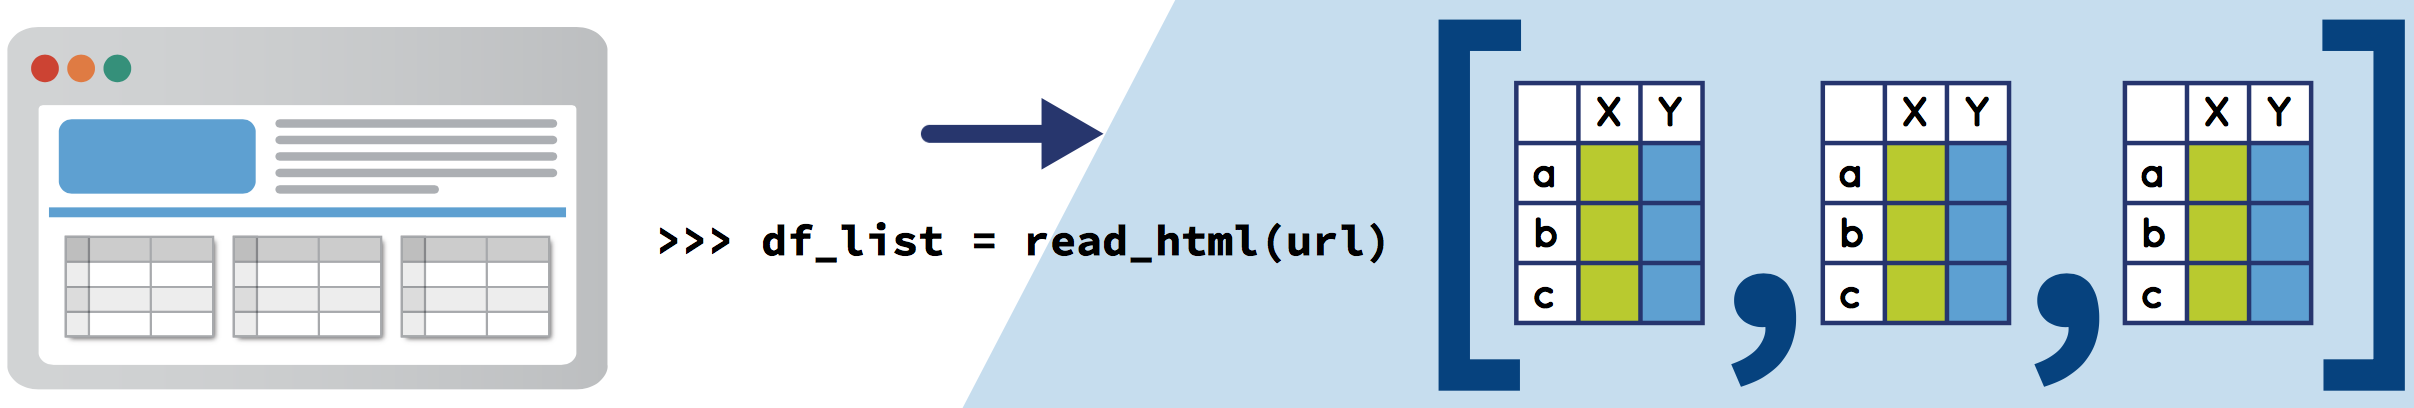

In [10]:
Image("imgs/web.png",width=600)


<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Save data structure 
</code>
 - to disk
```python
s_df.to_csv(filename)
s_df.to_excel(filename)
```

- to single Excel file
```python
writer = pd.ExcelWriter(filename)
df1.to_excel(writer, sheet_name='First')
df2.to_excel(writer, sheet_name='Second')
writer.save()
```

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">From/To Database
</code>
 - Read, using SQLAlchemy. Supports multiple databases:
```python
from sqlalchemy import create_engine
engine = create_engine(database_url)
conn = engine.connect()
df = pd.read_sql(query_str_or_table_name, conn)
```

- Write:
```python
df.to_sql(table_name, conn)
```

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Computation With Series/Dataframes
</code>

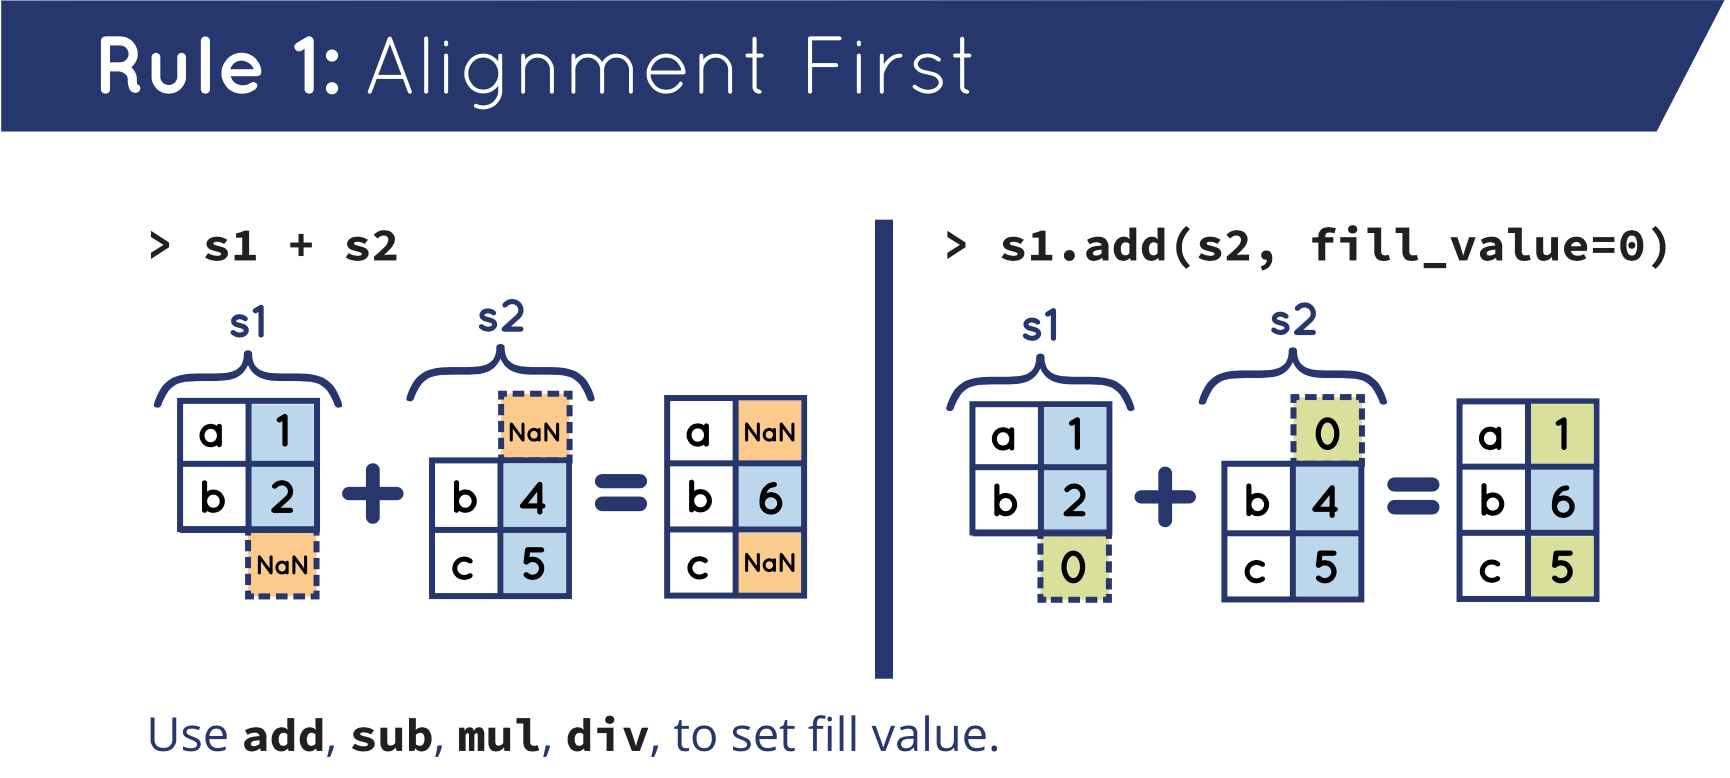

In [11]:
Image("imgs/rule1.png",width=600)

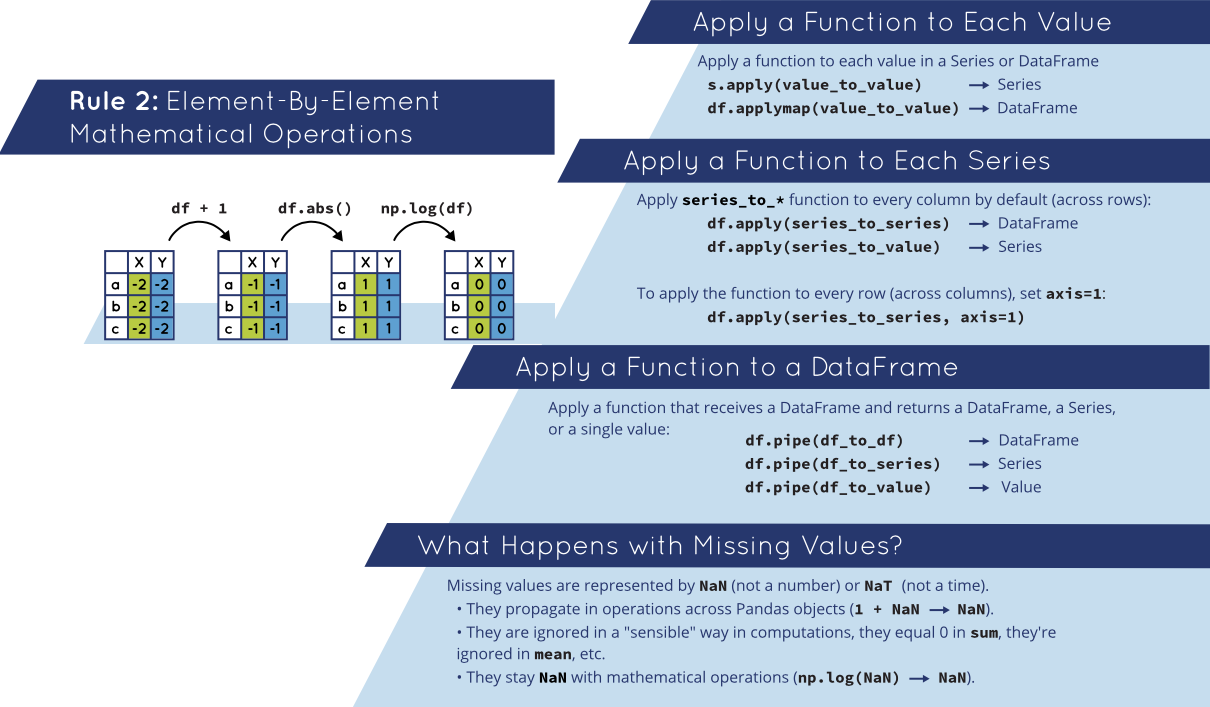

In [12]:
Image("imgs/rule2.png",width=600)

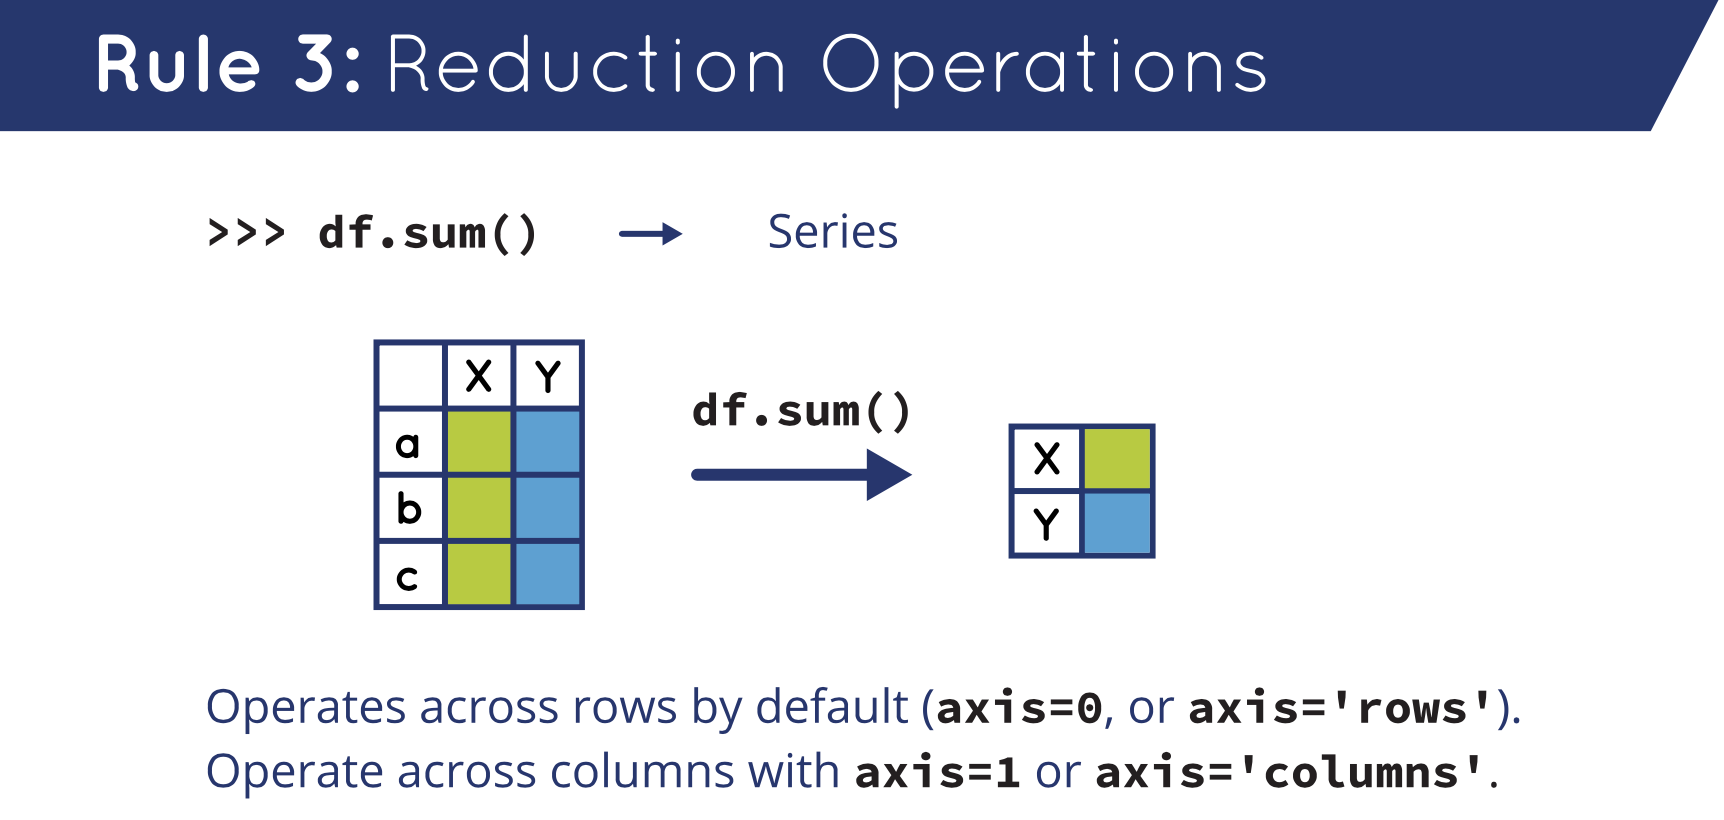

In [14]:
Image("imgs/rule31.png",width=600)

<font size=+1.2>
**count**: Number of non-null observations<br>
**sum**: sum of values<br>
**mean**: Mean of values<br>
**mad**: Mean absolute Deviation<br>
**median**: Arithmetric mean of values<br>
**min**: Minimum<br>
**max**: Maximum<br>
**mode**: Mode<br>
**prod**: Product of values<br>
**std**: Bessel-corrected sample standard deviation<br>
**var**: unbiased variance<br>
**sem**: Standard error of the mean<br>
**skew**: Sample skewness (3rd moment)<br>
**kurt**: Sample kurtosis (4th moment)<br>
**quantile**: Sample quantile (Value at %) values<br>
**value_counts**: Count of unique values
</font>

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Dataframe Split/Apply/Combine
</code>

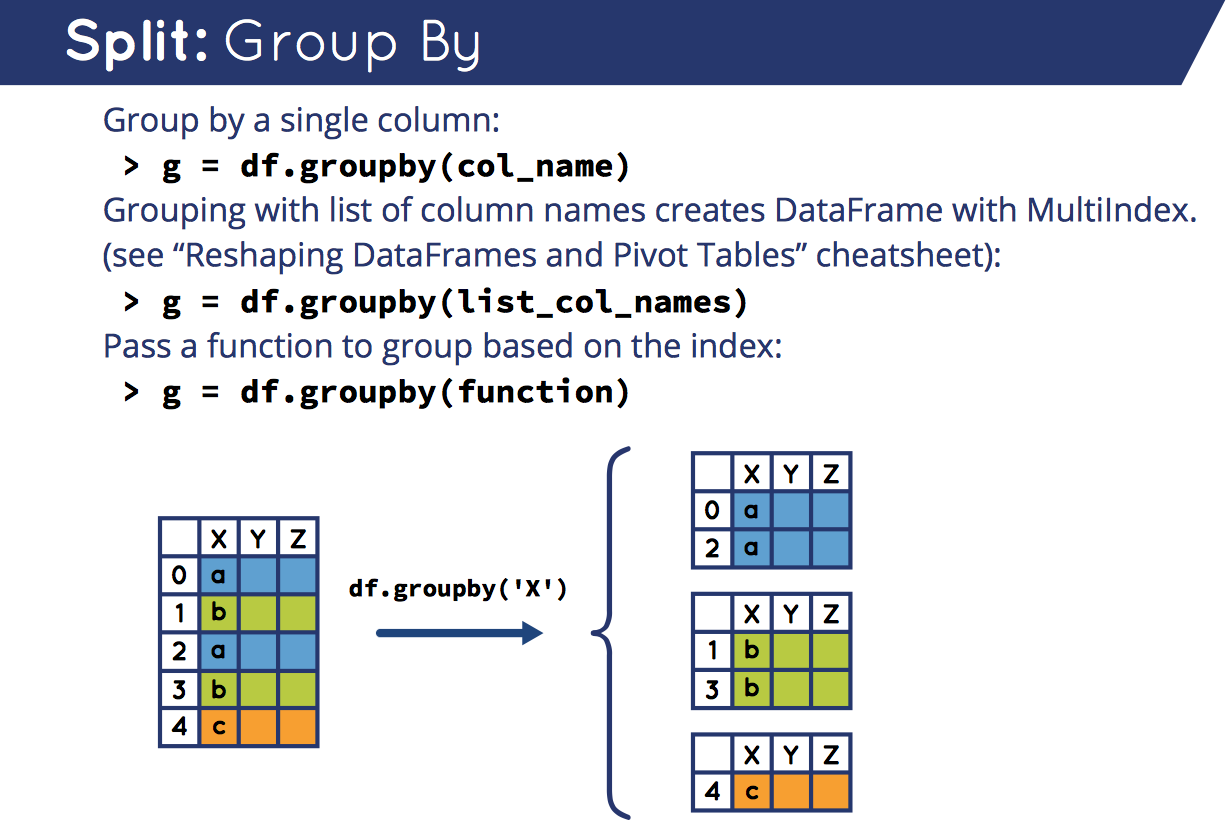

In [15]:
Image("imgs/split1.png",width=600)

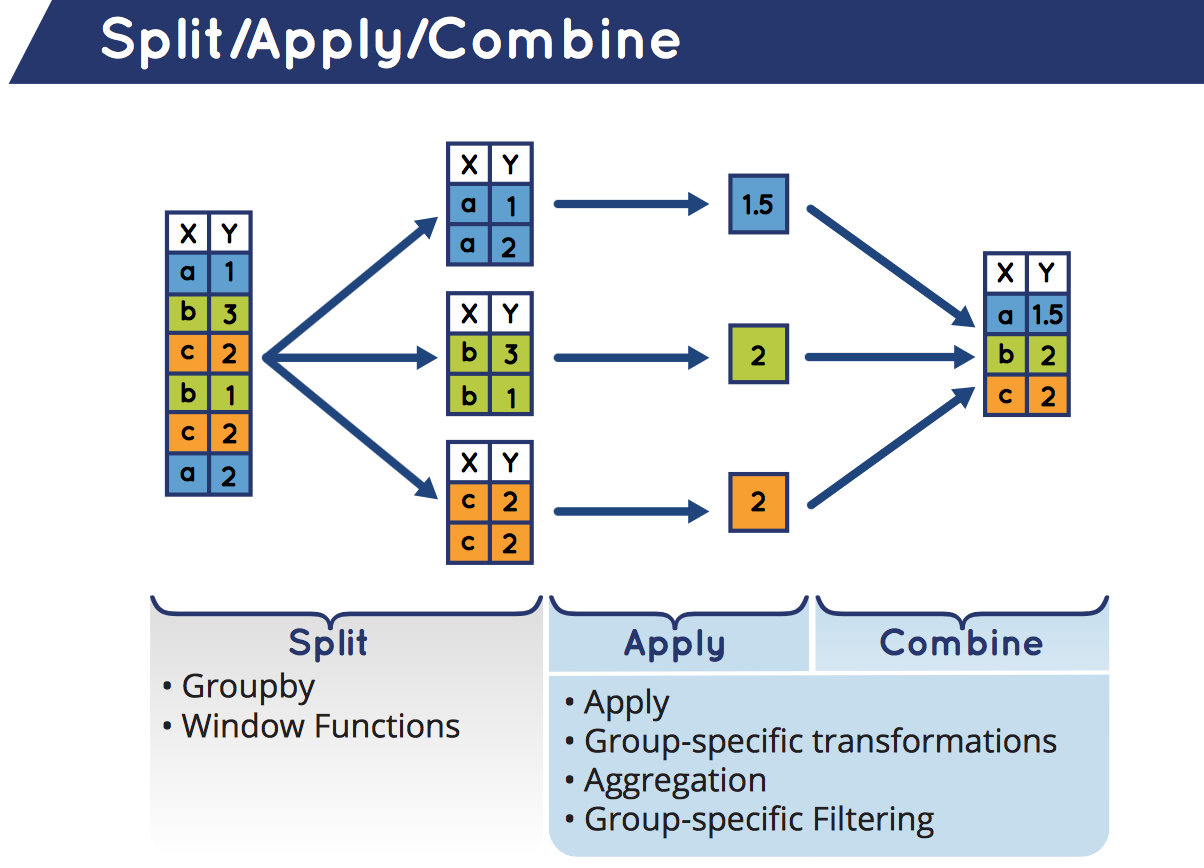

In [16]:
Image("imgs/split2.png",width=600)

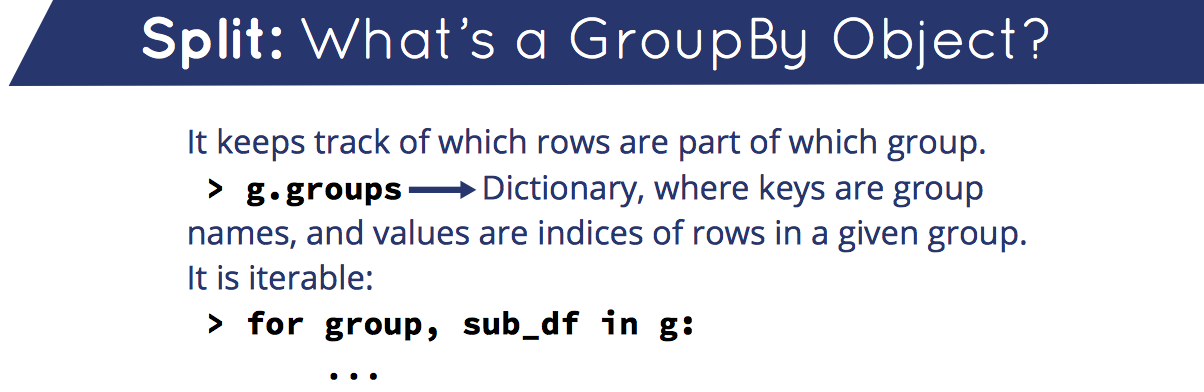

In [17]:
Image("imgs/split3.png",width=600)

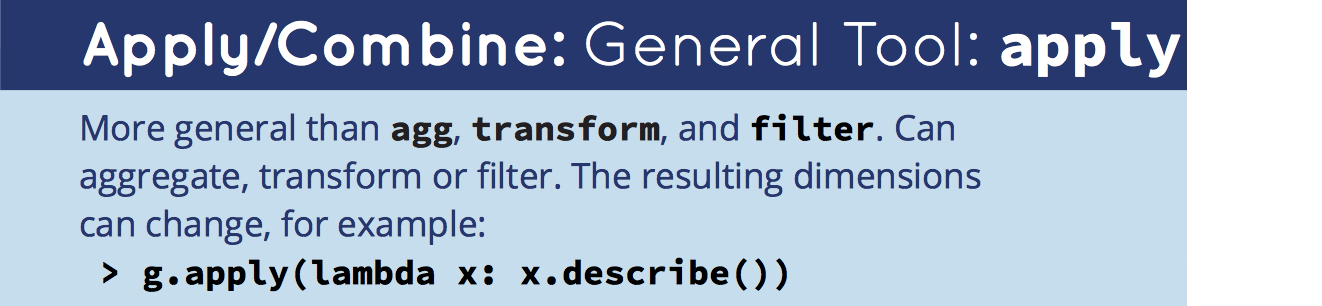

In [18]:
Image("imgs/apply1.png",width=600)

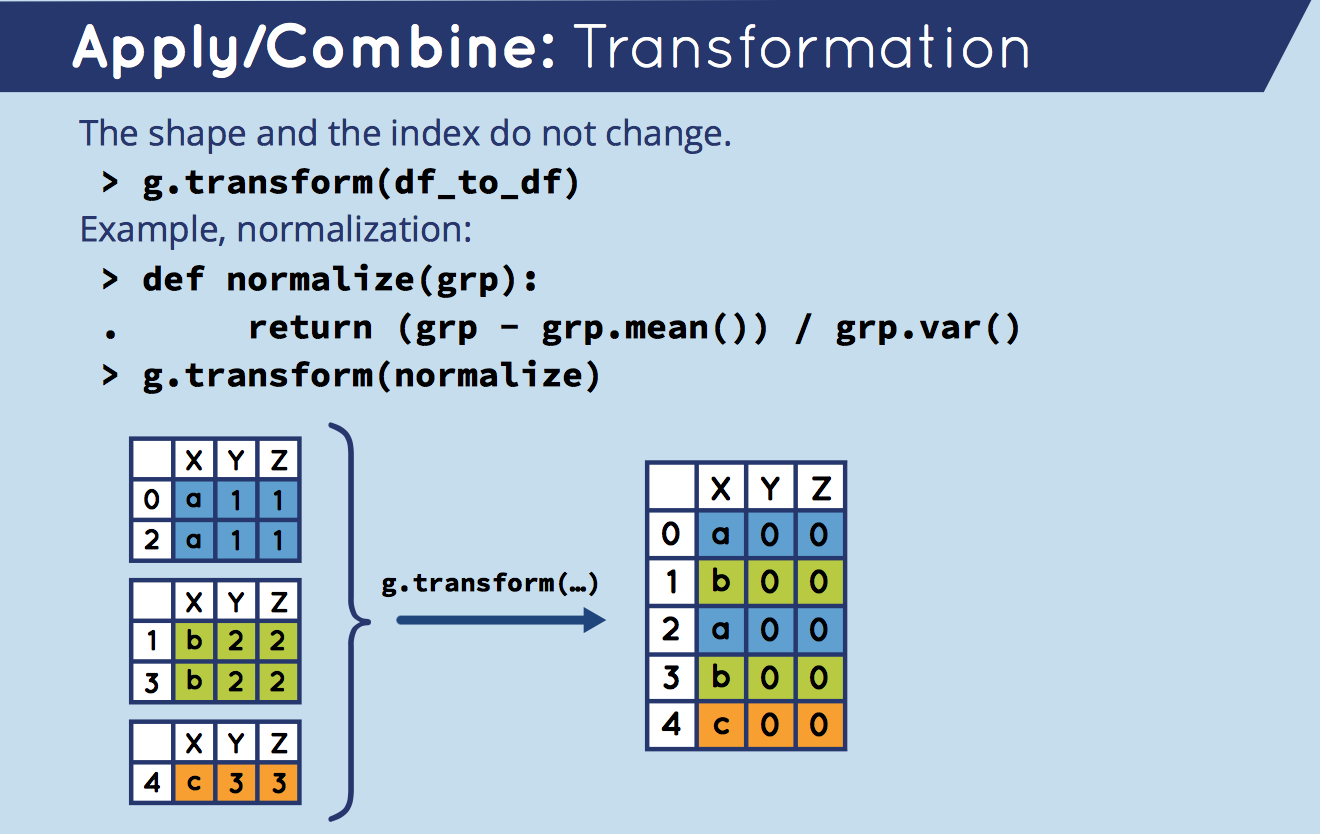

In [19]:
Image("imgs/apply2.png",width=600)

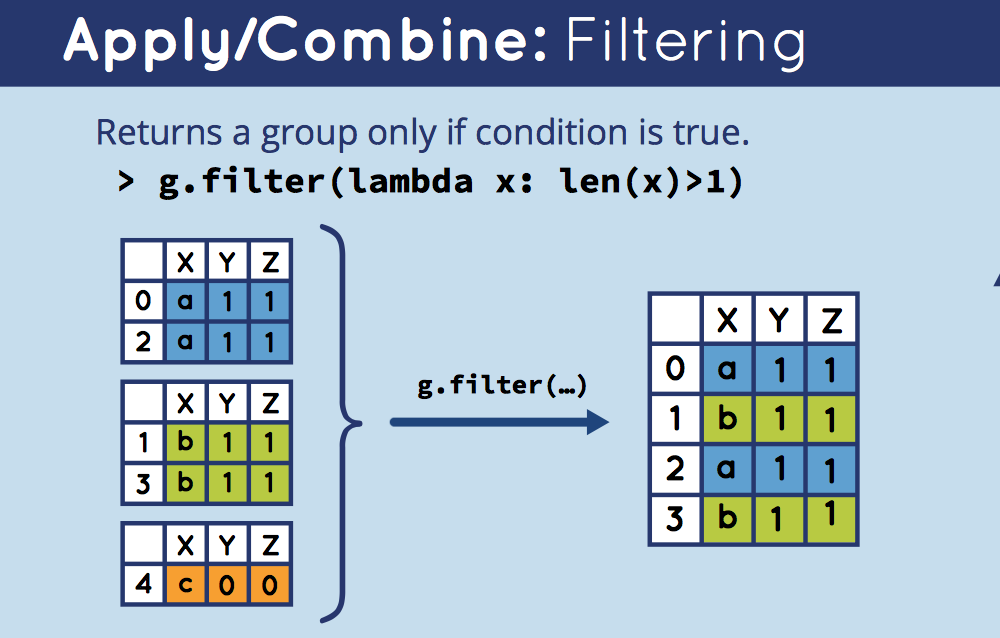

In [20]:
Image("imgs/apply3.png",width=600)

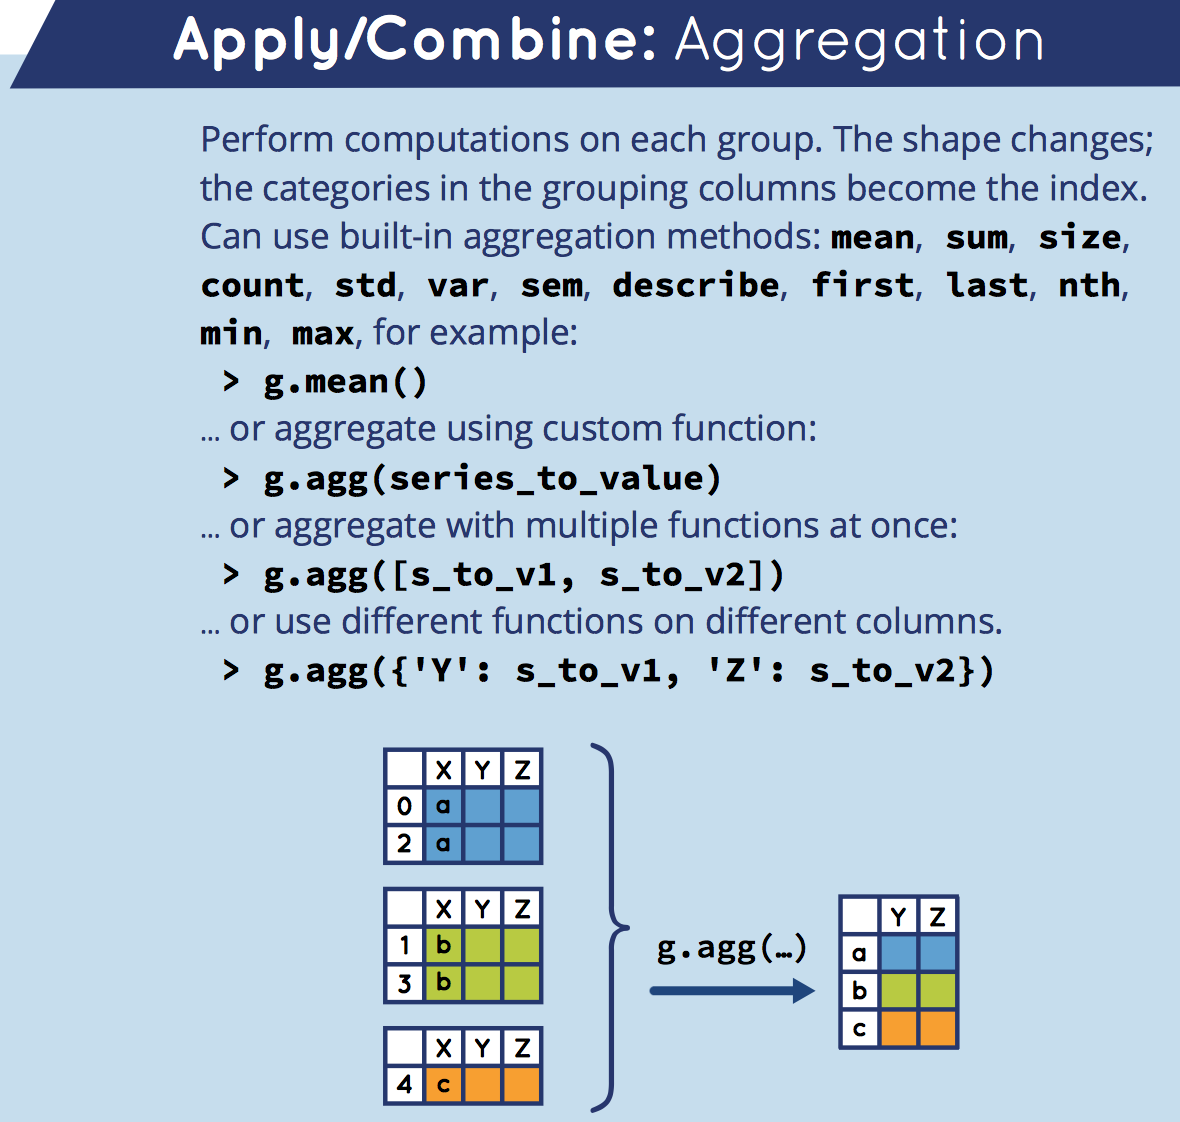

In [21]:
Image("imgs/apply4.png",width=600)

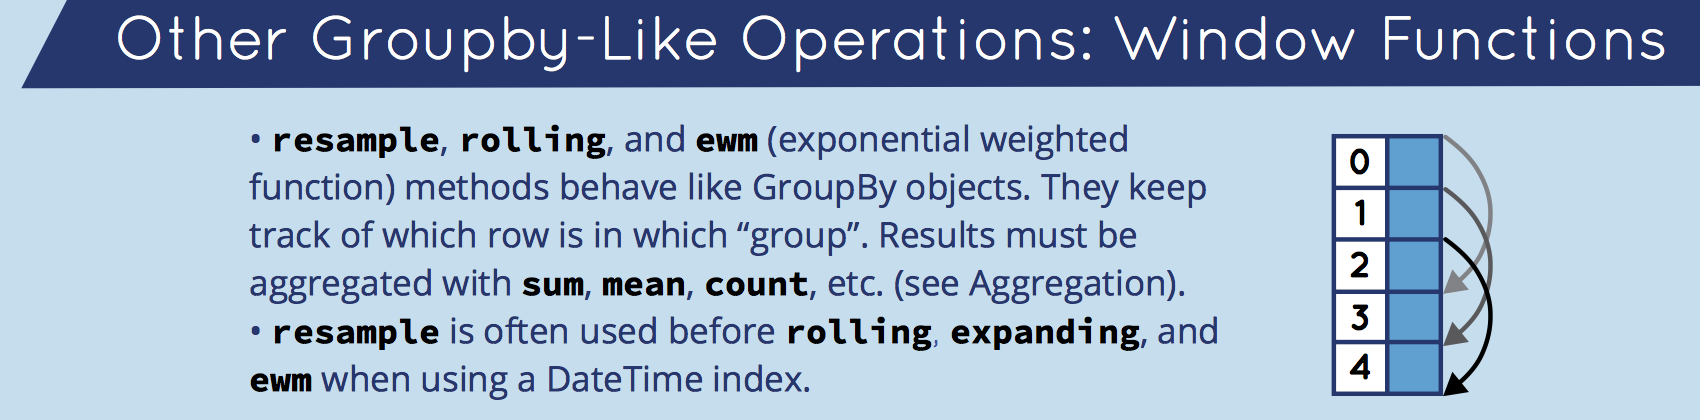

In [24]:
Image("imgs/others.png",width=600)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Manipulating Dates and Times
</code>
 Pandas makes a distinction between timestamps, called Datetime objects, and time spans, called Period objects.

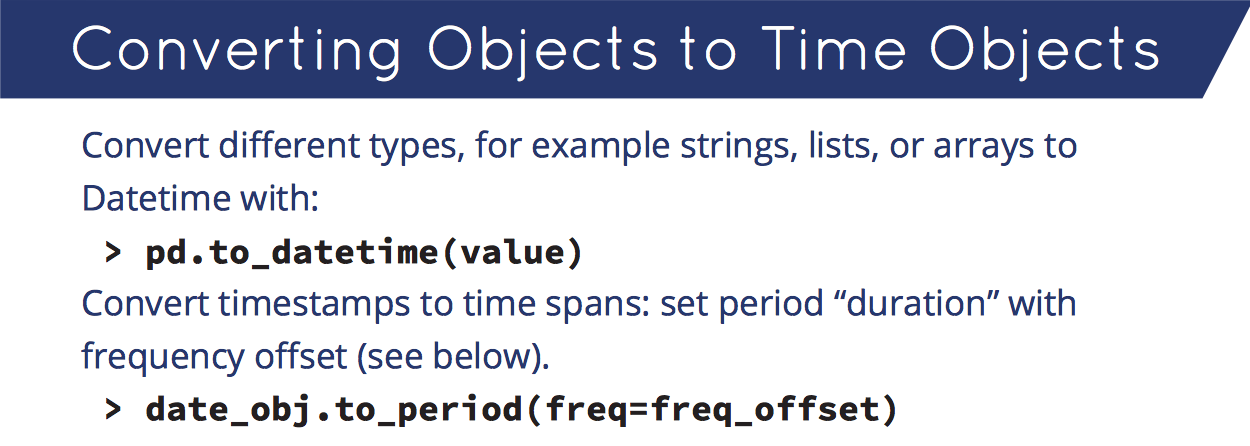

In [25]:
Image("imgs/date1.png",width=600)

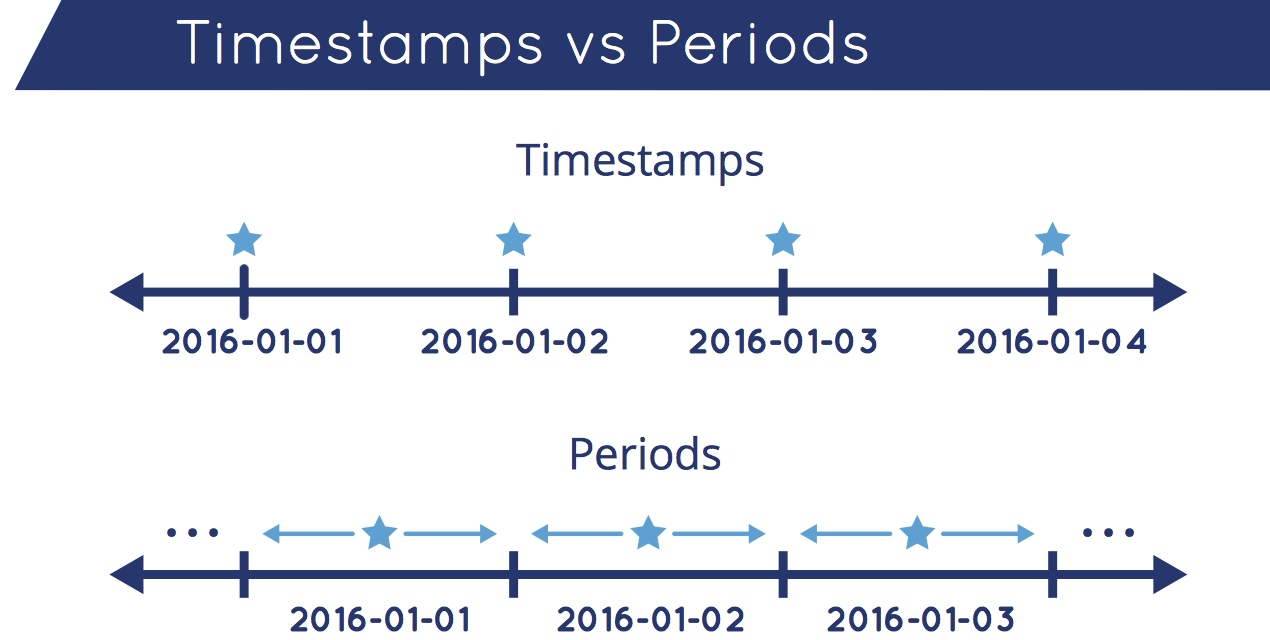

In [26]:
Image("imgs/date2.png",width=600)

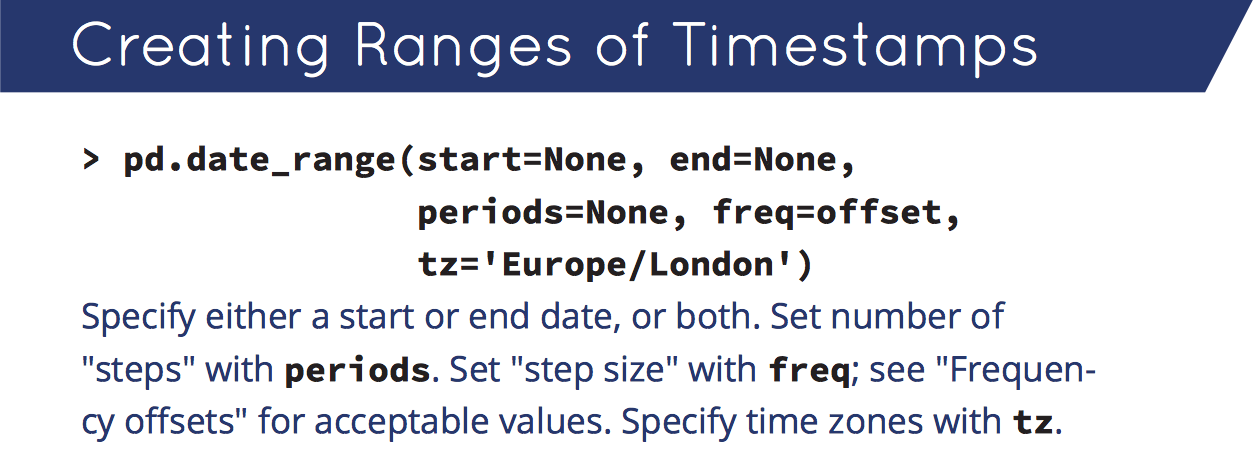

In [27]:
Image("imgs/date3.png",width=600)

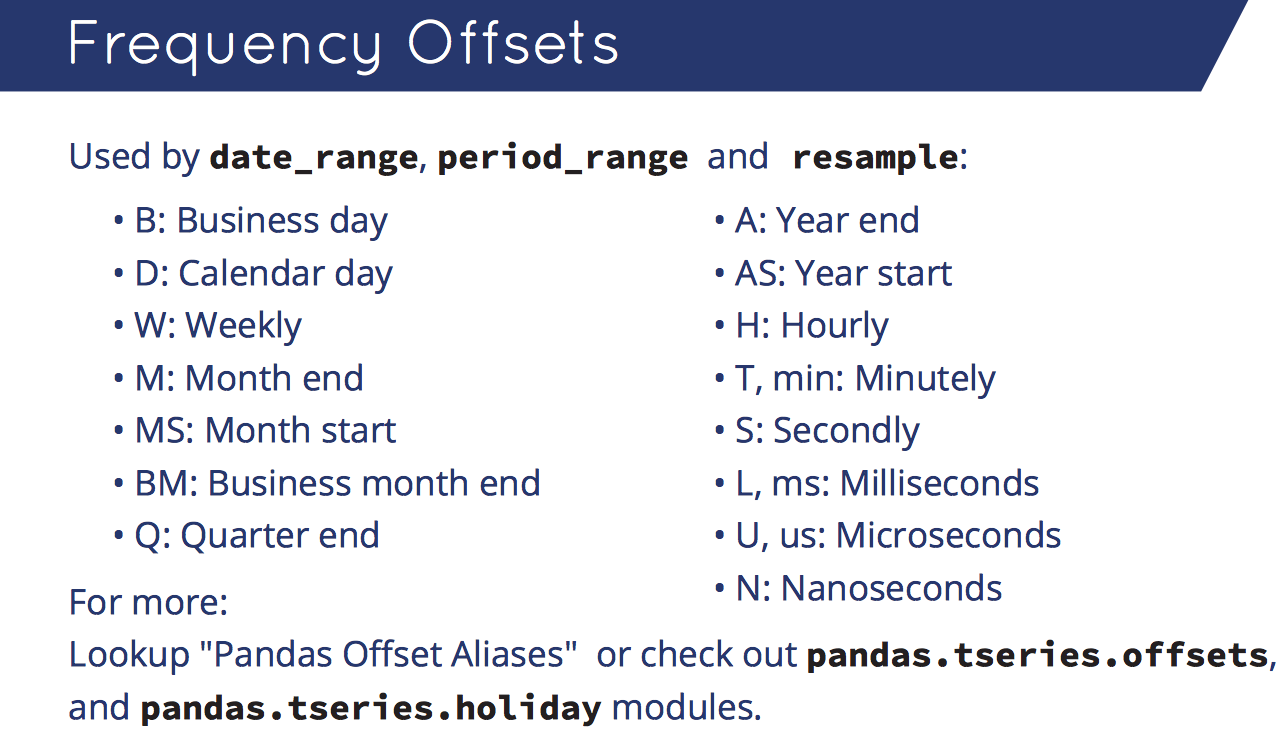

In [28]:
Image("imgs/date4.png",width=600)

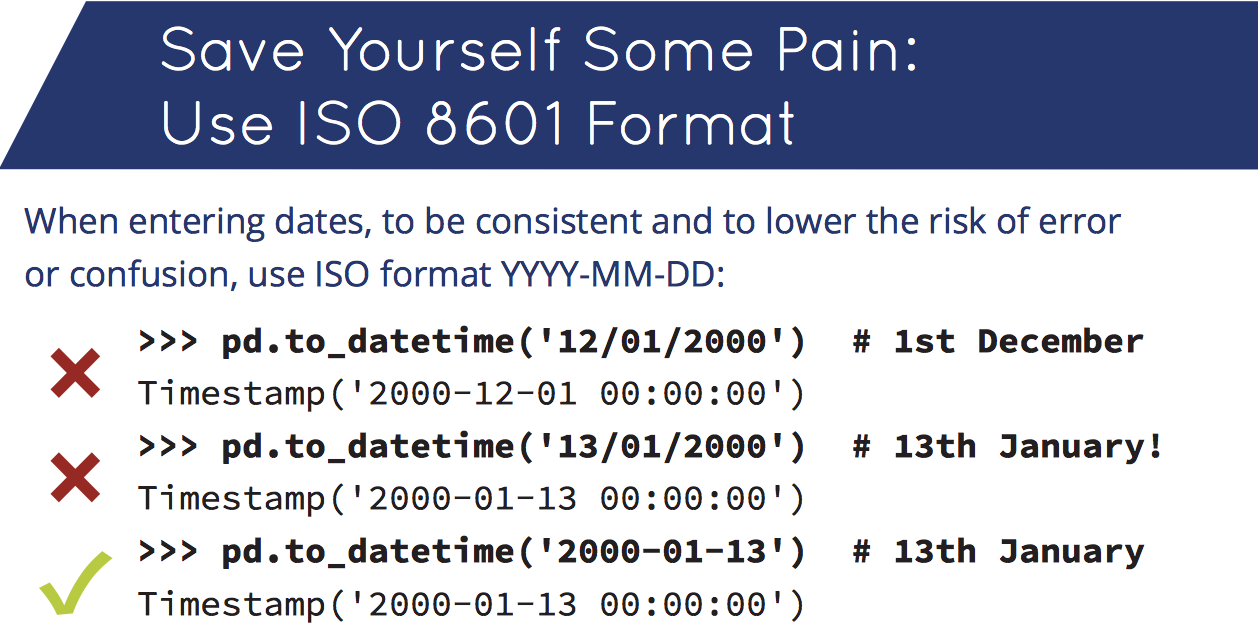

In [29]:
Image("imgs/date5.png",width=600)

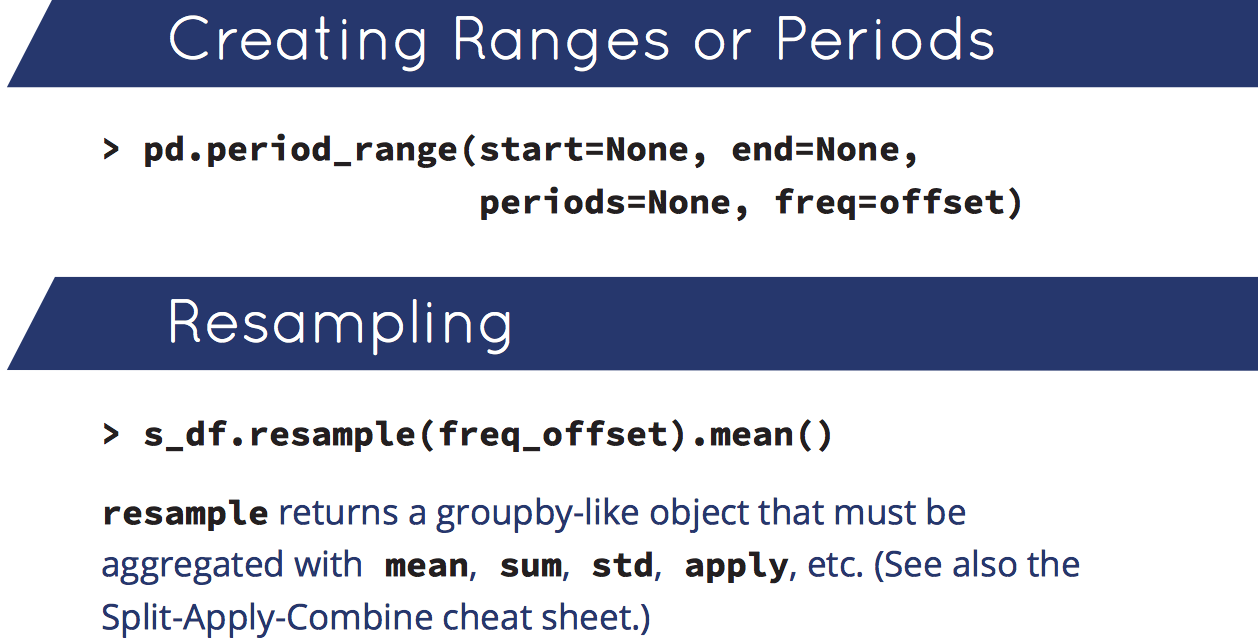

In [30]:
Image("imgs/date6.png",width=600)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Vectorized String Operations
</code>
Pandas implements vectorized string operations named after Python's string methods. Access them through the str attribute of string Series


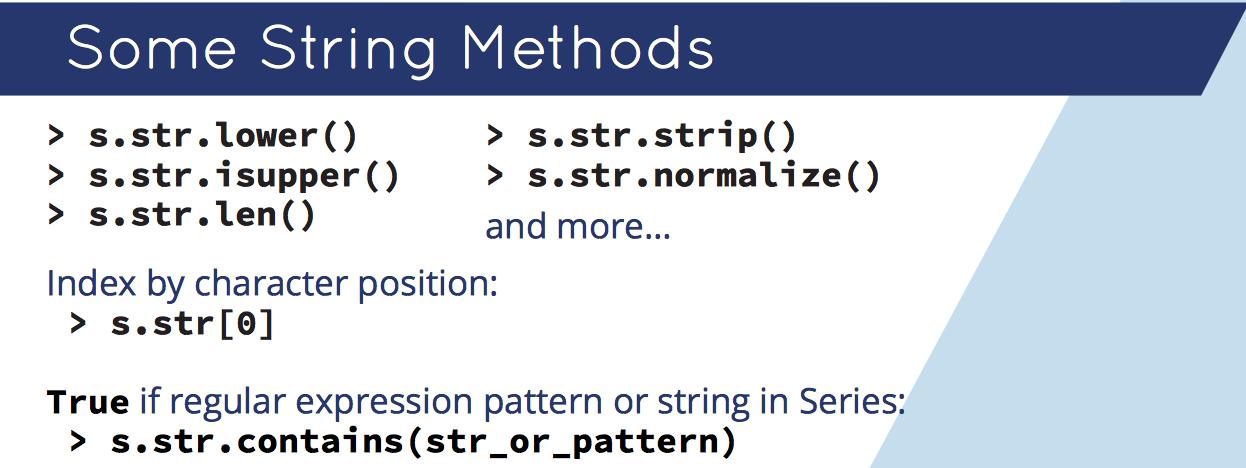

In [31]:
Image("imgs/string1.png",width=600)

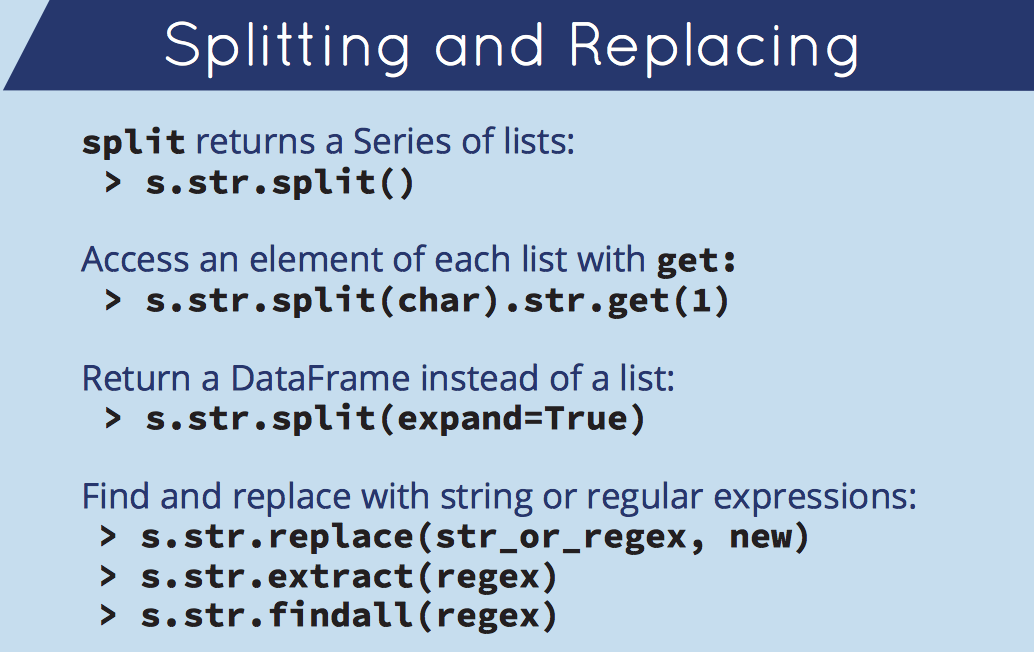

In [32]:
Image("imgs/string2.png",width=600)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Data Structures: Series/DataFrames
</code> 
A Series, s, maps an index to values. It is:
 - Like an ordered dictionary
 - A Numpy array with row labels and a name

A DataFrame, df, maps index and column labels to values. It is: 
 - Like a dictionary of Series (columns) sharing the same index 
 - A 2D Numpy array with row and column labels

s_df applies to both Series and DataFrames.
Assume that manipulations of Pandas object return copies.


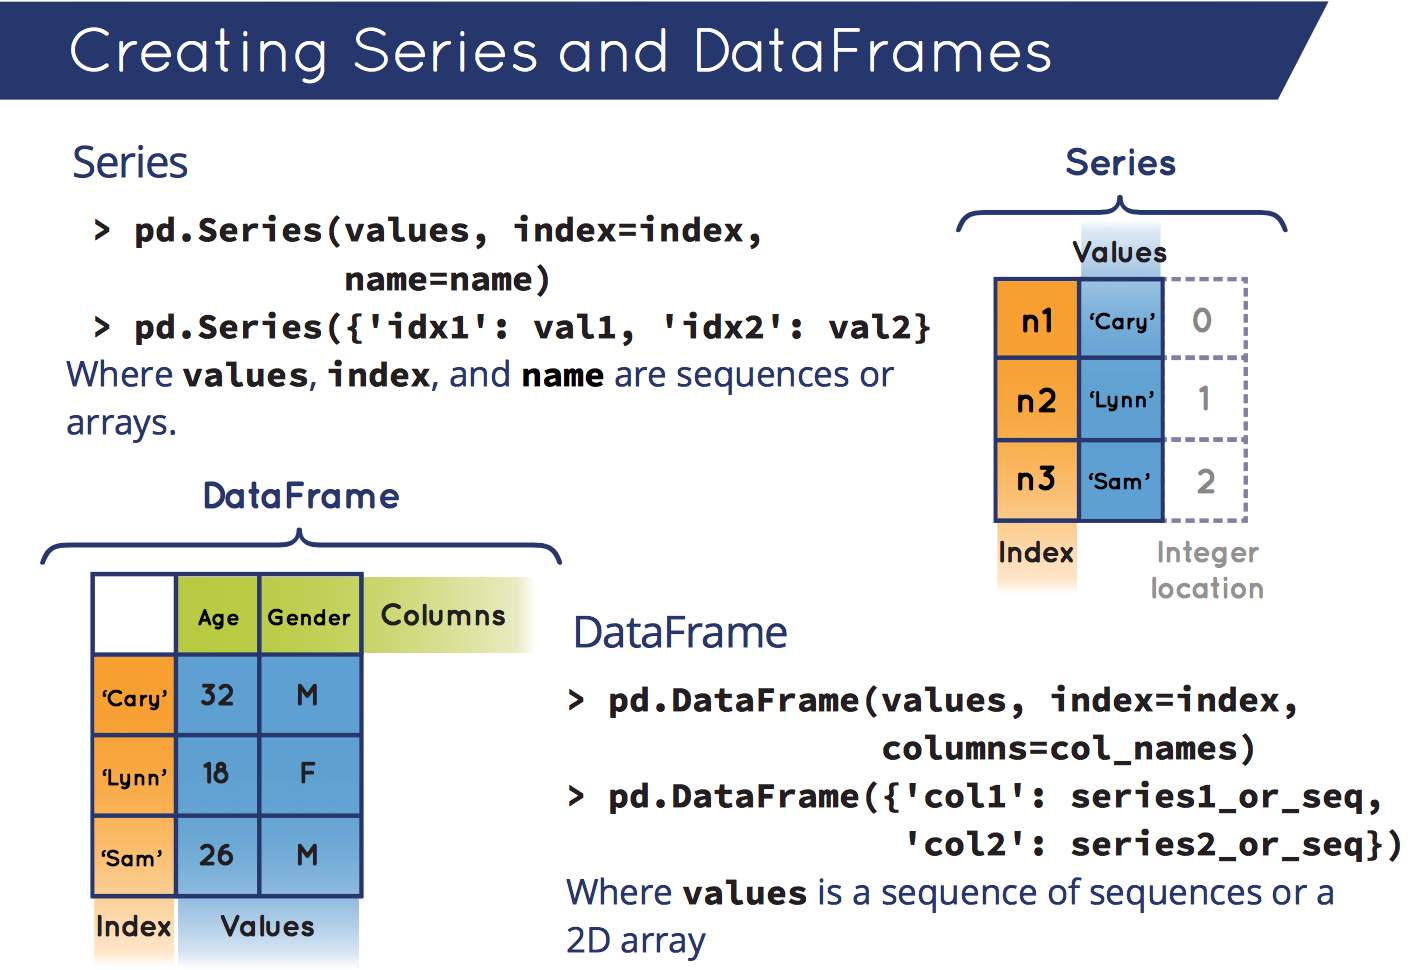

In [34]:
Image("imgs/structure1.png",width=600)

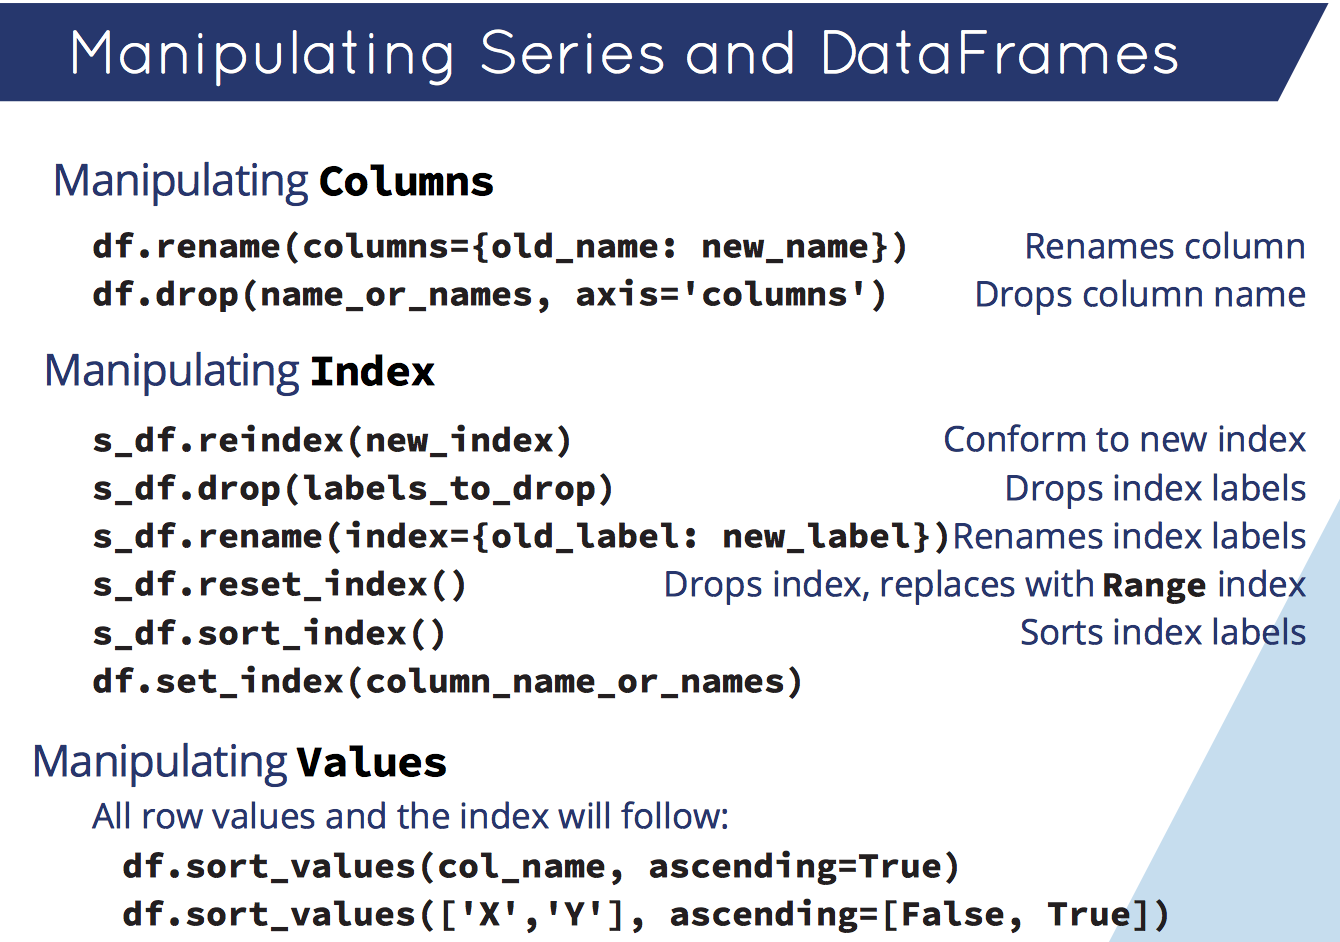

In [35]:
Image("imgs/structure2.png",width=600)

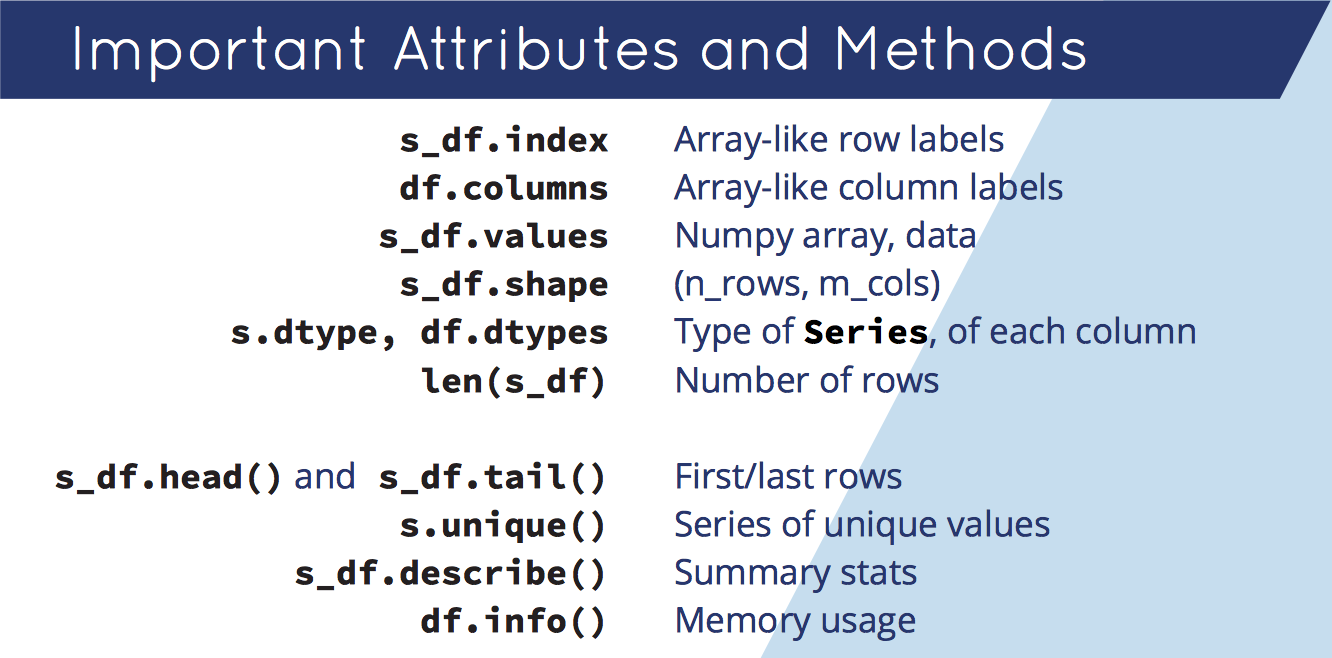

In [36]:
Image("imgs/structure3.png",width=600)

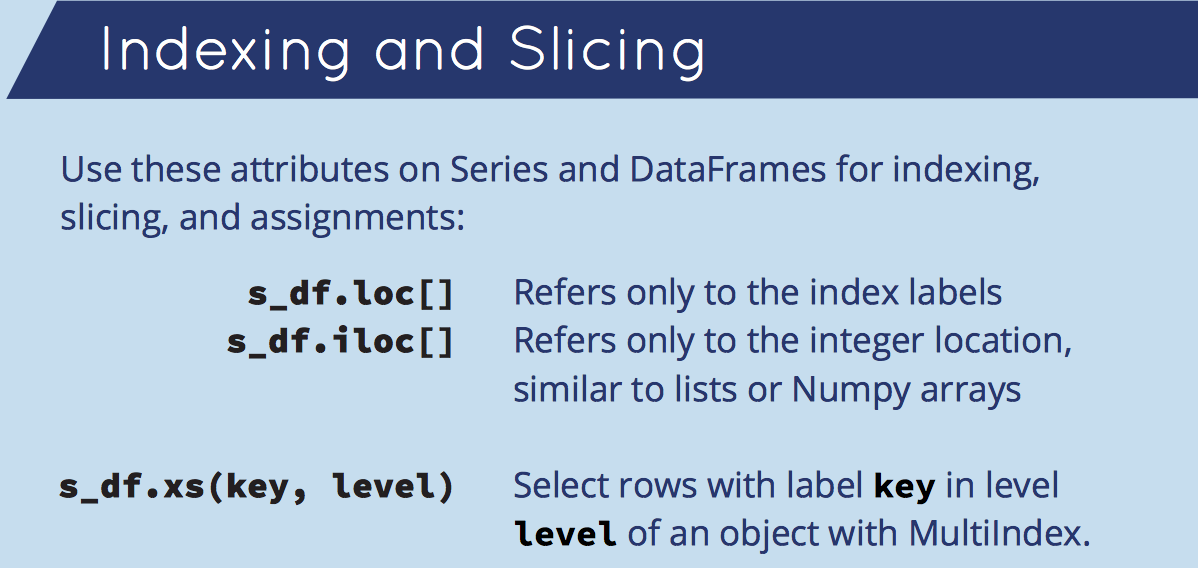

In [37]:
Image("imgs/structure4.png",width=600)

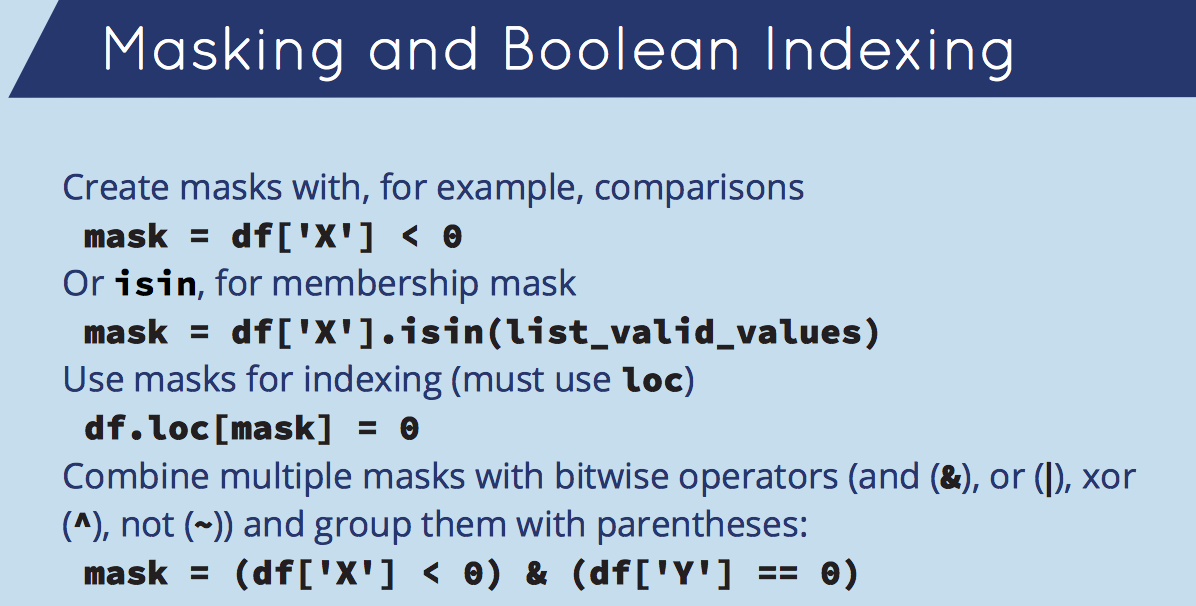

In [38]:
Image("imgs/structure5.png",width=600)

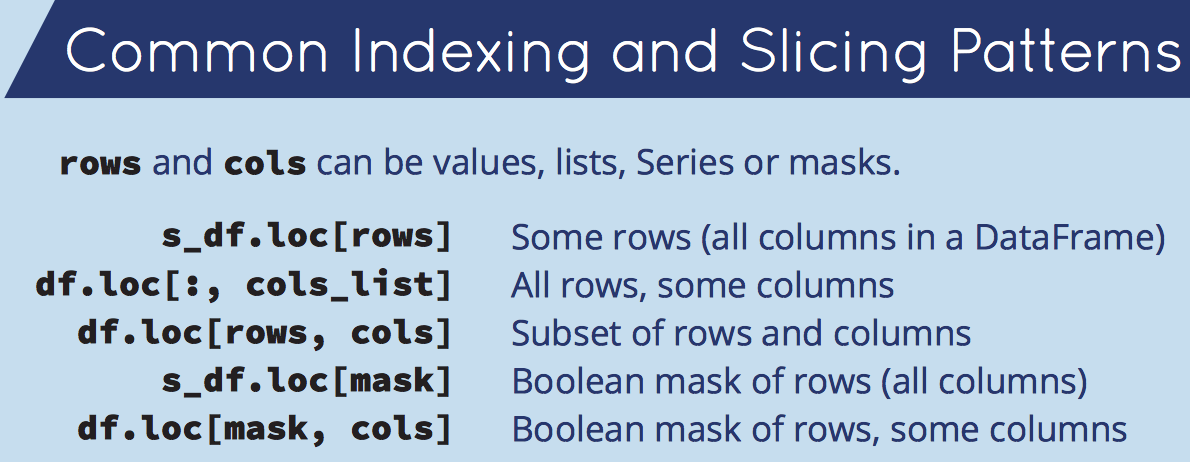

In [39]:
Image("imgs/structure6.png",width=600)

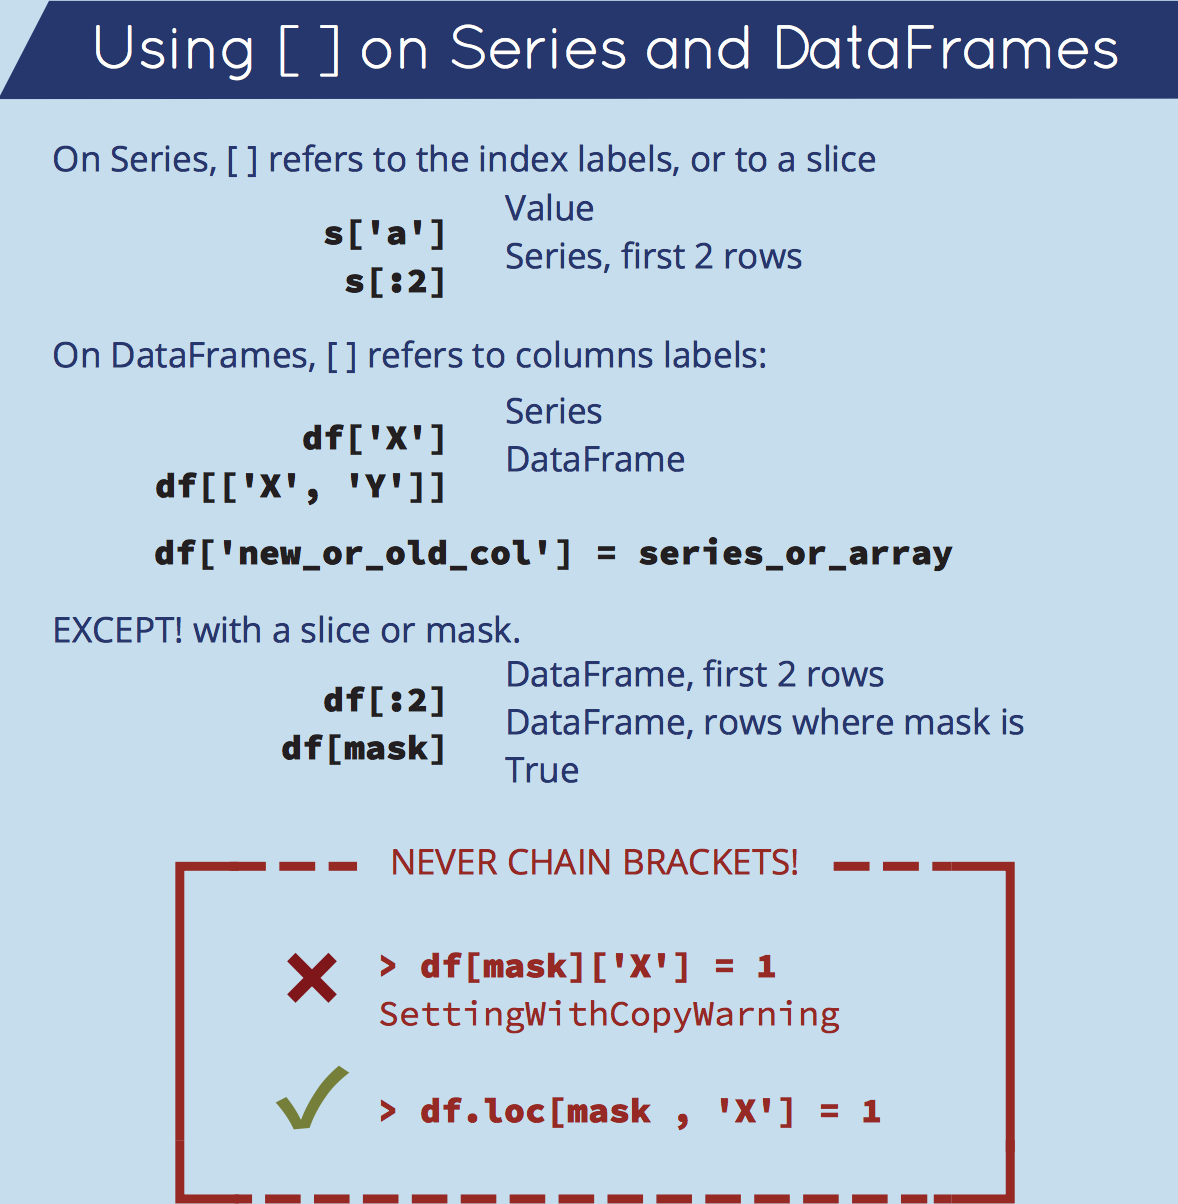

In [40]:
Image("imgs/structure7.png",width=600)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">
Combining DataFrames

</code> 
Tools for combining Series and DataFrames together, with SQL-type joins and concatenation. Use join if merging on indices, otherwise use merge.

Merge on Column Values
---
```
> pd.merge(left, right, how='inner', on='id')
```

Ignores index, unless on=None. See value of how below.
Use on if merging on same column in both DataFrames, otherwise use left_on, right_on.


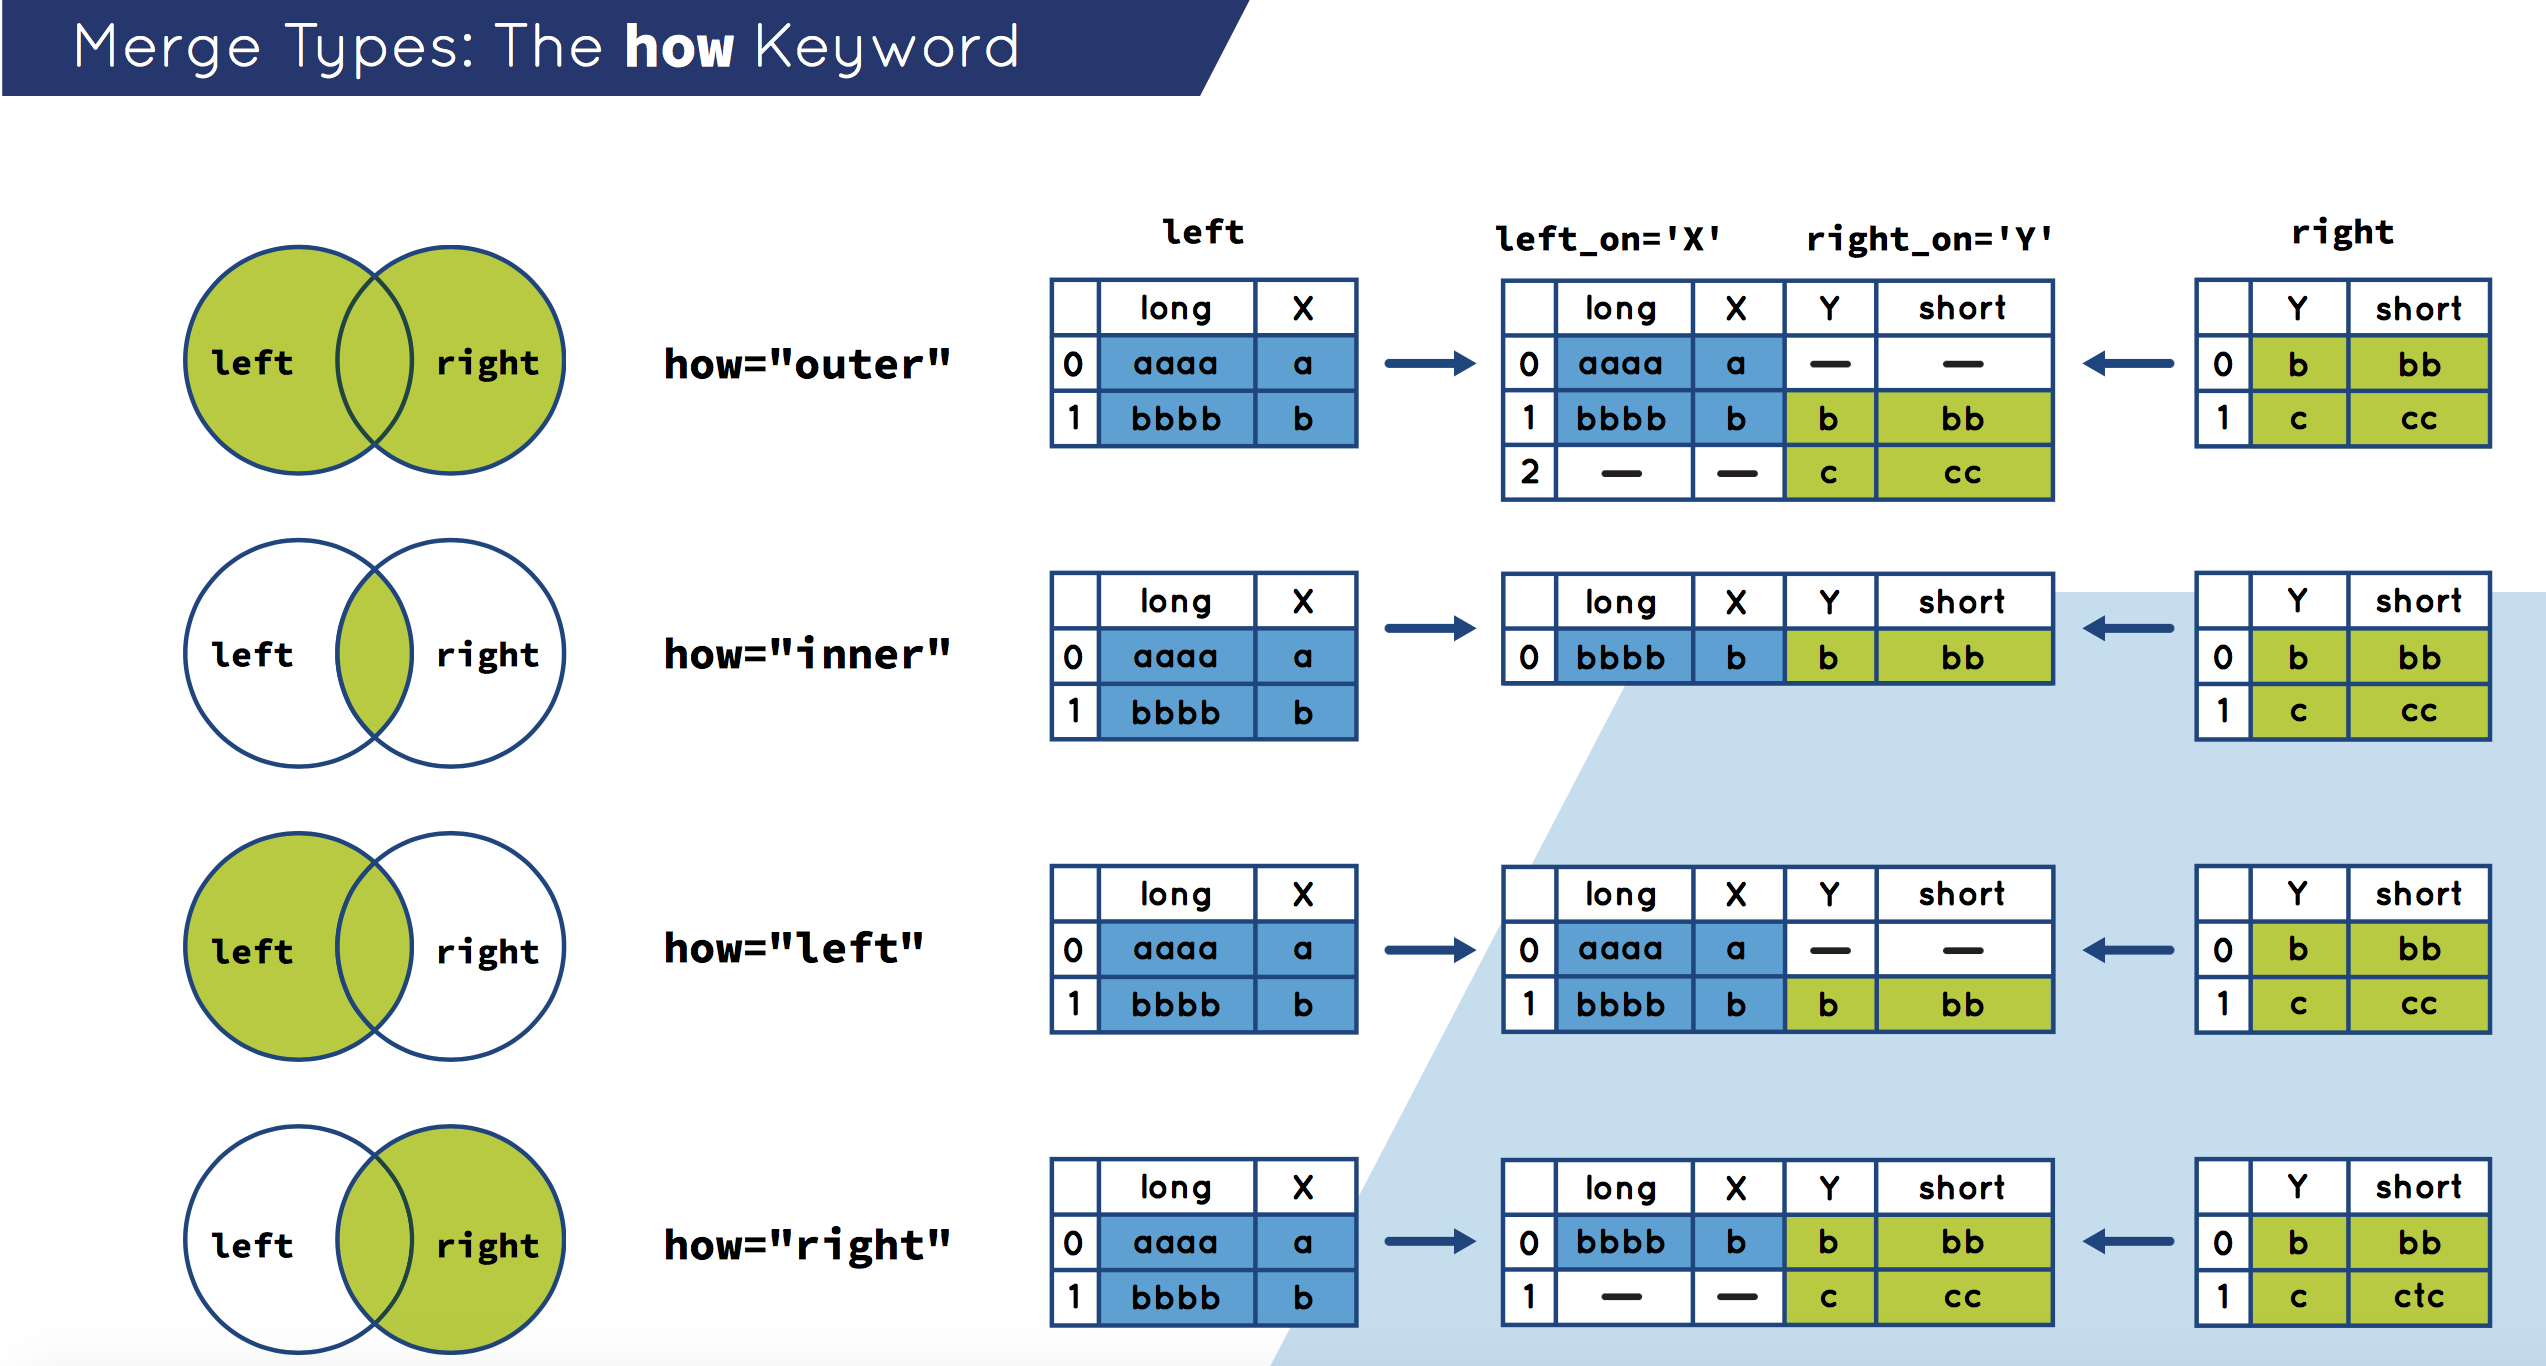

In [41]:
Image("imgs/Mdata.png",width=600)


Concatenating DataFrames
---
```python
pd.concat(df_list)
```

“Stacks” DataFrames on top of each other.
Set ignore_index=True, to replace index with RangeIndex. Note: Faster than repeated df.append(other_df).

Join on Index
---
```
> df.join(other)
```

Merge DataFrames on index. Set on=keys to join on index of df and on keys of other. Join uses pd.merge under the covers

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Cleaning Data with Missing Values
</code>


Pandas represents missing values as NaN (Not a Number). It comes from Numpy and is of type float64. Pandas has many methods to find and replace missing values.

**Find Missing Values**

```python
s_df.isnull() or > pd.isnull(obj) 
s_df.notnull() or > pd.notnull(obj)
```

**Replacing Missing Values**


```
      s_df.loc[s_df.isnull()] = 0  Use mask to replace NaN
s_df.interpolate(method='linear')  Interpolate using different methods
      s_df.fillna(method='ffill')  Fill forward (last valid value)
      s_df.fillna(method='bfill')  Or backward (next valid value)
           s_df.dropna(how='any')  Drop rows if any value is NaN
           s_df.dropna(how='all')  Drop rows if all values are NaN
   s_df.dropna(how='all', axis=1)  Drop across columns instead of rows
```

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Reshaping Dataframes/Pivot Tables
</code>

 Tools for reshaping DataFrames from the wide to the long format and back. The long format can be tidy, which means that "each variable is a column, each observation is a row"1. Tidy data is easier to filter, aggregate, transform, sort, and pivot.  Reshaping operations often produce multi-level indices or columns, which can be sliced and indexed.
 


**MultiIndex**: A Multi-Level Hierarchical Index

Often created as a result of:
```
  > df.groupby(list_of_columns)
  > df.set_index(list_of_columns)
```

Contiguous labels are displayed together but apply to each row. The concept is similar to multi-level columns.

A **MultiIndex** allows indexing and slicing one or multiple levels at once. Using the Long example from the right:
```
                        long.loc[1900]  Pivot Tables
            long.loc[(1900, 'March')]   value2
      long.xs('March', level='Month')   All March rows
```

Simpler than using boolean indexing, for example:
```
> long[long.Month == 'March']
```

**Long to Wide Format and Back with stack() and unstack()**



Pivot column level to index, i.e. "stacking the columns" (wide to long):
```
 > df.stack()
```

Pivot index level to columns, "unstack the columns" (long to wide):
```
 > df.unstack()
```

If multiple indices or column levels, use level number or name to stack/unstack:
```
 > df.unstack(0) or > df.unstack('Year')
```

A common use case for unstacking, plotting group data vs index after groupby:
```
 > (df.groupby(['A', 'B])['relevant'].mean()
      .unstack().plot())
```

Omitting index, columns, or values will use all remaining columns of df. You can "pivot" a table manually using groupby, stack and unstack.

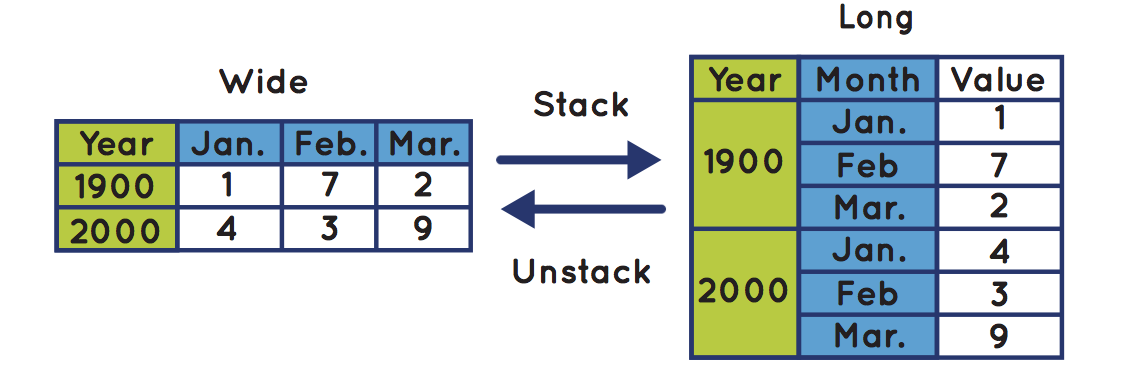

In [42]:
Image("imgs/index.png",width=600)

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">Pivot Tables
</code>

```
> pd.pivot_table(df,
                index=cols, (keys to group by for index) 
                columns=cols2, (keys to group by for columns) 
                values=cols3, (columns to aggregate) 
                aggfunc='mean') (what to do with repeated values)
```

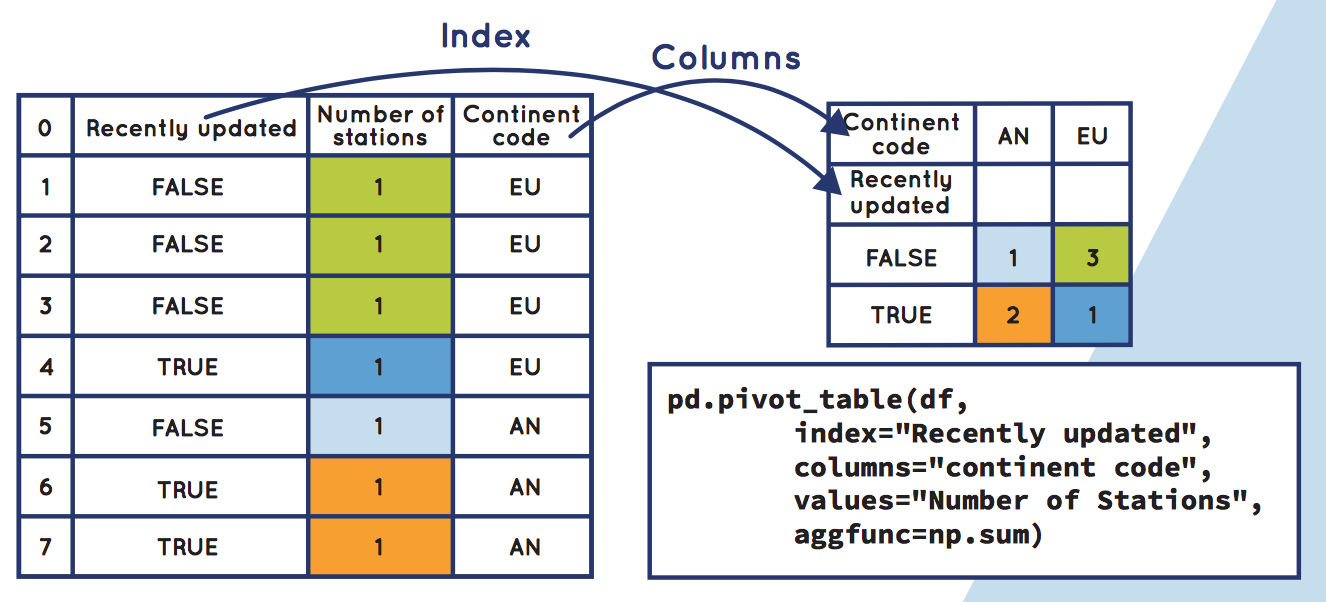

In [44]:
Image("imgs/pivot.png",width=600)



<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">df.pivot() vs pd.pivot_table</code>

```
         df.pivot()   Does not deal with repeated values in index. 
                      It's a declarative form of stack and unstack.
   pd.pivot_table()   Use if you have repeated values in index 
                      (specify aggfunc argument)
```

<code style="background-color:darkblue;color:white;font-size:2em;font-face:bold">From Wide to Long with melt</code>

Specify which columns are identifiers (id_vars, values will be repeated for each row) and which are "measured variables" (value_vars, will become values in variable column.
All remaining columns by default).
```
pd.melt(df, id_vars=id_cols, value_vars=value_columns)
```

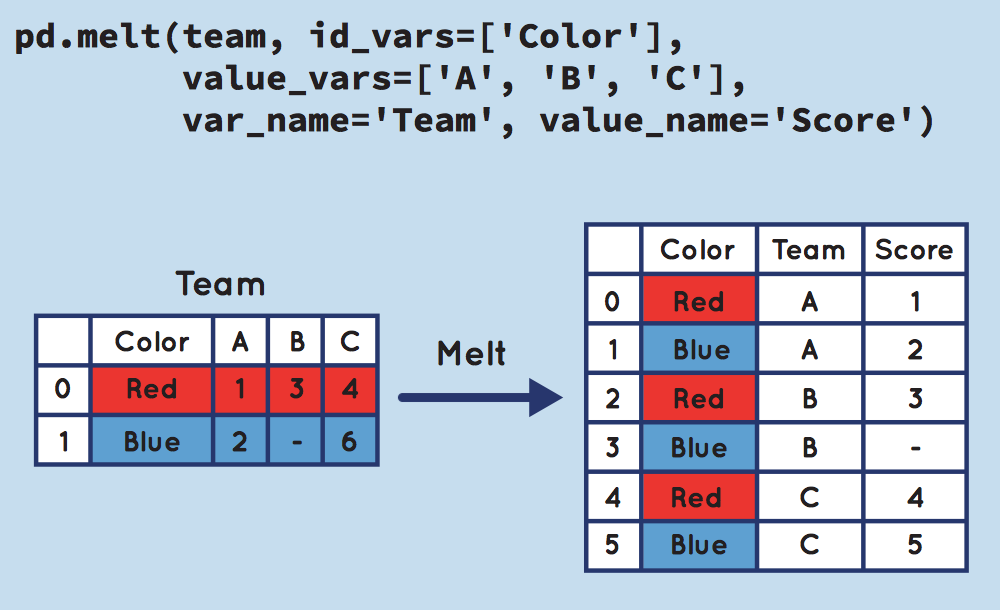

In [43]:
Image("imgs/melt.png",width=600)